In [ ]:
print(dt.datetime.now())

2022-09-14 13:18:21.868965


In [ ]:
import datetime as dt

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# importing important libraries

import numpy as np
import pandas as pd
from datetime import datetime, date
import matplotlib.pyplot as plt
import seaborn as sns # for plotting pairwise relationships in a dataset.
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split #for train test splitting
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier #for decision tree object
from sklearn.metrics import classification_report, confusion_matrix #for checking testing results
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree #for visualizing tree
from sklearn.ensemble import RandomForestClassifier

In [ ]:
df = pd.read_csv(r'C:\Users\Administrator\Intern\credit_card_fraud_detection\fraudTrain.csv')
df.head()

Unnamed: 0 trans_date_trans_time            cc_num  \
0           0   2019-01-01 00:00:18  2703186189652095   
1           1   2019-01-01 00:00:44      630423337322   
2           2   2019-01-01 00:00:51    38859492057661   
3           3   2019-01-01 00:01:16  3534093764340240   
4           4   2019-01-01 00:03:06   375534208663984   

                             merchant       category     amt      first  \
0          fraud_Rippin, Kub and Mann       misc_net    4.97   Jennifer   
1     fraud_Heller, Gutmann and Zieme    grocery_pos  107.23  Stephanie   
2                fraud_Lind-Buckridge  entertainment  220.11     Edward   
3  fraud_Kutch, Hermiston and Farrell  gas_transport   45.00     Jeremy   
4                 fraud_Keeling-Crist       misc_pos   41.96      Tyler   

      last gender                        street  ...      lat      long  \
0    Banks      F                561 Perry Cove  ...  36.0788  -81.1781   
1     Gill      F  43039 Riley Greens Suite 393  ...  48.8878 -118.2105   
2  Sanchez      M      594 White Dale Suite 530  ...  42.1808 -112.2620   
3    White      M   9443 Cynthia Court Apt. 038  ...  46.2306 -112.1138   
4   Garcia      M              408 Bradley Rest  ...  38.4207  -79.4629   

   city_pop                                job         dob  \
0      3495          Psychologist, counselling  1988-03-09   
1       149  Special educational needs teacher  1978-06-21   
2      4154        Nature conservation officer  1962-01-19   
3      1939                    Patent attorney  1967-01-12   
4        99     Dance movement psychotherapist  1986-03-28   

                          trans_num   unix_time  merch_lat  merch_long  \
0  0b242abb623afc578575680df30655b9  1325376018  36.011293  -82.048315   
1  1f76529f8574734946361c461b024d99  1325376044  49.159047 -118.186462   
2  a1a22d70485983eac12b5b88dad1cf95  1325376051  43.150704 -112.154481   
3  6b849c168bdad6f867558c3793159a81  1325376076  47.034331 -112.561071   
4  a41d7549acf90789359a9aa5346dcb46  1325376186  38.674999  -78.632459   

   is_fraud  
0         0  
1         0  
2         0  
3         0  
4         0  

[5 rows x 23 columns]

In [ ]:
# Making copy of train data
df_train_copy = df.copy()

In [ ]:
pd.set_option('display.max_columns', 300)
pd.set_option('display.max_rows', 300)
pd.set_option('display.max_colwidth', 300)

In [ ]:
df.head()

Unnamed: 0 trans_date_trans_time            cc_num  \
0           0   2019-01-01 00:00:18  2703186189652095   
1           1   2019-01-01 00:00:44      630423337322   
2           2   2019-01-01 00:00:51    38859492057661   
3           3   2019-01-01 00:01:16  3534093764340240   
4           4   2019-01-01 00:03:06   375534208663984   

                             merchant       category     amt      first  \
0          fraud_Rippin, Kub and Mann       misc_net    4.97   Jennifer   
1     fraud_Heller, Gutmann and Zieme    grocery_pos  107.23  Stephanie   
2                fraud_Lind-Buckridge  entertainment  220.11     Edward   
3  fraud_Kutch, Hermiston and Farrell  gas_transport   45.00     Jeremy   
4                 fraud_Keeling-Crist       misc_pos   41.96      Tyler   

      last gender                        street            city state    zip  \
0    Banks      F                561 Perry Cove  Moravian Falls    NC  28654   
1     Gill      F  43039 Riley Greens Suite 393          Orient    WA  99160   
2  Sanchez      M      594 White Dale Suite 530      Malad City    ID  83252   
3    White      M   9443 Cynthia Court Apt. 038         Boulder    MT  59632   
4   Garcia      M              408 Bradley Rest        Doe Hill    VA  24433   

       lat      long  city_pop                                job         dob  \
0  36.0788  -81.1781      3495          Psychologist, counselling  1988-03-09   
1  48.8878 -118.2105       149  Special educational needs teacher  1978-06-21   
2  42.1808 -112.2620      4154        Nature conservation officer  1962-01-19   
3  46.2306 -112.1138      1939                    Patent attorney  1967-01-12   
4  38.4207  -79.4629        99     Dance movement psychotherapist  1986-03-28   

                          trans_num   unix_time  merch_lat  merch_long  \
0  0b242abb623afc578575680df30655b9  1325376018  36.011293  -82.048315   
1  1f76529f8574734946361c461b024d99  1325376044  49.159047 -118.186462   
2  a1a22d70485983eac12b5b88dad1cf95  1325376051  43.150704 -112.154481   
3  6b849c168bdad6f867558c3793159a81  1325376076  47.034331 -112.561071   
4  a41d7549acf90789359a9aa5346dcb46  1325376186  38.674999  -78.632459   

   is_fraud  
0         0  
1         0  
2         0  
3         0  
4         0

In [ ]:
df.tail()

Unnamed: 0 trans_date_trans_time               cc_num  \
1296670     1296670   2020-06-21 12:12:08       30263540414123   
1296671     1296671   2020-06-21 12:12:19     6011149206456997   
1296672     1296672   2020-06-21 12:12:32     3514865930894695   
1296673     1296673   2020-06-21 12:13:36     2720012583106919   
1296674     1296674   2020-06-21 12:13:37  4292902571056973207   

                                    merchant       category     amt  \
1296670                    fraud_Reichel Inc  entertainment   15.56   
1296671             fraud_Abernathy and Sons    food_dining   51.70   
1296672                 fraud_Stiedemann Ltd    food_dining  105.93   
1296673  fraud_Reinger, Weissnat and Strosin    food_dining   74.90   
1296674  fraud_Langosh, Wintheiser and Hyatt    food_dining    4.30   

               first       last gender                         street  \
1296670         Erik  Patterson      M       162 Jessica Row Apt. 072   
1296671      Jeffrey      White      M  8617 Holmes Terrace Suite 651   
1296672  Christopher  Castaneda      M     1632 Cohen Drive Suite 639   
1296673       Joseph     Murray      M           42933 Ryan Underpass   
1296674      Jeffrey      Smith      M           135 Joseph Mountains   

                             city state    zip      lat      long  city_pop  \
1296670                     Hatch    UT  84735  37.7175 -112.4777       258   
1296671                 Tuscarora    MD  21790  39.2667  -77.5101       100   
1296672  High Rolls Mountain Park    NM  88325  32.9396 -105.8189       899   
1296673                 Manderson    SD  57756  43.3526 -102.5411      1126   
1296674                      Sula    MT  59871  45.8433 -113.8748       218   

                                      job         dob  \
1296670                      Geoscientist  1961-11-24   
1296671  Production assistant, television  1979-12-11   
1296672                   Naval architect  1967-08-30   
1296673             Volunteer coordinator  1980-08-18   
1296674          Therapist, horticultural  1995-08-16   

                                trans_num   unix_time  merch_lat  merch_long  \
1296670  440b587732da4dc1a6395aba5fb41669  1371816728  36.841266 -111.690765   
1296671  278000d2e0d2277d1de2f890067dcc0a  1371816739  38.906881  -78.246528   
1296672  483f52fe67fabef353d552c1e662974c  1371816752  33.619513 -105.130529   
1296673  d667cdcbadaaed3da3f4020e83591c83  1371816816  42.788940 -103.241160   
1296674  8f7c8e4ab7f25875d753b422917c98c9  1371816817  46.565983 -114.186110   

         is_fraud  
1296670         0  
1296671         0  
1296672         0  
1296673         0  
1296674         0

In [ ]:
df.shape

(1296675, 23)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [ ]:
# checking duplicate values
df[df.duplicated() == True]

Empty DataFrame
Columns: [Unnamed: 0, trans_date_trans_time, cc_num, merchant, category, amt, first, last, gender, street, city, state, zip, lat, long, city_pop, job, dob, trans_num, unix_time, merch_lat, merch_long, is_fraud]
Index: []

no duplicate present in dataset

In [ ]:
#checking fraud and non-fraud count
df.is_fraud.value_counts()

0    1289169
1       7506
Name: is_fraud, dtype: int64

In [ ]:
round(df.isnull().sum()*100/len(df),2).sort_values(ascending = False)

Unnamed: 0               0.0
zip                      0.0
merch_long               0.0
merch_lat                0.0
unix_time                0.0
trans_num                0.0
dob                      0.0
job                      0.0
city_pop                 0.0
long                     0.0
lat                      0.0
state                    0.0
trans_date_trans_time    0.0
city                     0.0
street                   0.0
gender                   0.0
last                     0.0
first                    0.0
amt                      0.0
category                 0.0
merchant                 0.0
cc_num                   0.0
is_fraud                 0.0
dtype: float64

In [ ]:
# here we convert the column 'trans_date_trans_time' to datetime

df['trans_date_trans_time'] =  pd.to_datetime(df['trans_date_trans_time'], format='%Y-%m-%d %H:%M:%S.%f')

In [ ]:
print(df['trans_date_trans_time'].dtypes)

datetime64[ns]


In [ ]:
# getting the corresponding day of date

df['Day'] = df['trans_date_trans_time'].dt.day_name()
df['Day']

0          Tuesday
1          Tuesday
2          Tuesday
3          Tuesday
4          Tuesday
            ...   
1296670     Sunday
1296671     Sunday
1296672     Sunday
1296673     Sunday
1296674     Sunday
Name: Day, Length: 1296675, dtype: object

In [ ]:
# for make different sessions we are taking only Hour's from the 'trans_date_trans_time' column

df['Hours'] = df['trans_date_trans_time'].dt.hour
df['Hours'].head()

0    0
1    0
2    0
3    0
4    0
Name: Hours, dtype: int64

In [ ]:
# Partitioning the day into 6 different sessions

b = [0,4,8,12,16,20,23]
l = ['Late Night', 'Early Morning','Morning','Noon','Evening','Night']
df['session'] = pd.cut(df['Hours'], bins=b, labels=l, include_lowest=True)

In [ ]:
df['session']

0          Late Night
1          Late Night
2          Late Night
3          Late Night
4          Late Night
              ...    
1296670       Morning
1296671       Morning
1296672       Morning
1296673       Morning
1296674       Morning
Name: session, Length: 1296675, dtype: category
Categories (6, object): ['Late Night' < 'Early Morning' < 'Morning' < 'Noon' < 'Evening' < 'Night']

In [ ]:
df['session'].unique()

['Late Night', 'Early Morning', 'Morning', 'Noon', 'Evening', 'Night']
Categories (6, object): ['Late Night' < 'Early Morning' < 'Morning' < 'Noon' < 'Evening' < 'Night']

In [ ]:
# we used 'Hours' column to make different session and it's work is over so we are deleting it

df.drop('Hours', axis = 1, inplace = True)

In [ ]:
df.head(2)

Unnamed: 0 trans_date_trans_time            cc_num  \
0           0   2019-01-01 00:00:18  2703186189652095   
1           1   2019-01-01 00:00:44      630423337322   

                          merchant     category     amt      first   last  \
0       fraud_Rippin, Kub and Mann     misc_net    4.97   Jennifer  Banks   
1  fraud_Heller, Gutmann and Zieme  grocery_pos  107.23  Stephanie   Gill   

  gender                        street            city state    zip      lat  \
0      F                561 Perry Cove  Moravian Falls    NC  28654  36.0788   
1      F  43039 Riley Greens Suite 393          Orient    WA  99160  48.8878   

       long  city_pop                                job         dob  \
0  -81.1781      3495          Psychologist, counselling  1988-03-09   
1 -118.2105       149  Special educational needs teacher  1978-06-21   

                          trans_num   unix_time  merch_lat  merch_long  \
0  0b242abb623afc578575680df30655b9  1325376018  36.011293  -82.048315   
1  1f76529f8574734946361c461b024d99  1325376044  49.159047 -118.186462   

   is_fraud      Day     session  
0         0  Tuesday  Late Night  
1         0  Tuesday  Late Night

In [ ]:
# it is redundant column

df.drop('Unnamed: 0', axis = 1, inplace = True)

In [ ]:
# the columns are not usable so we are droping it

df.drop(['cc_num', 'first', 'last', 'zip','unix_time','trans_num', 'street', ],axis = 1, inplace = True)

In [ ]:
df.head(2)

trans_date_trans_time                         merchant     category     amt  \
0   2019-01-01 00:00:18       fraud_Rippin, Kub and Mann     misc_net    4.97   
1   2019-01-01 00:00:44  fraud_Heller, Gutmann and Zieme  grocery_pos  107.23   

  gender            city state      lat      long  city_pop  \
0      F  Moravian Falls    NC  36.0788  -81.1781      3495   
1      F          Orient    WA  48.8878 -118.2105       149   

                                 job         dob  merch_lat  merch_long  \
0          Psychologist, counselling  1988-03-09  36.011293  -82.048315   
1  Special educational needs teacher  1978-06-21  49.159047 -118.186462   

   is_fraud      Day     session  
0         0  Tuesday  Late Night  
1         0  Tuesday  Late Night

In [ ]:
# here we convert the column 'dob' to datetime

df['dob'] =  pd.to_datetime(df['dob'], format='%Y-%m-%d')

In [ ]:
print(df['dob'].dtype)

datetime64[ns]


In [ ]:
# calculating age from the column 'dob' and 'trans_date_trans_time'

df['Age'] = (df['trans_date_trans_time'].dt.year - df['dob'].dt.year) - ((df['trans_date_trans_time'].dt.month - df['dob'].dt.month) < 0)

In [ ]:
df['Age'].head()

0    30
1    40
2    57
3    52
4    32
Name: Age, dtype: int64

In [ ]:
df.head(2)

trans_date_trans_time                         merchant     category     amt  \
0   2019-01-01 00:00:18       fraud_Rippin, Kub and Mann     misc_net    4.97   
1   2019-01-01 00:00:44  fraud_Heller, Gutmann and Zieme  grocery_pos  107.23   

  gender            city state      lat      long  city_pop  \
0      F  Moravian Falls    NC  36.0788  -81.1781      3495   
1      F          Orient    WA  48.8878 -118.2105       149   

                                 job        dob  merch_lat  merch_long  \
0          Psychologist, counselling 1988-03-09  36.011293  -82.048315   
1  Special educational needs teacher 1978-06-21  49.159047 -118.186462   

   is_fraud      Day     session  Age  
0         0  Tuesday  Late Night   30  
1         0  Tuesday  Late Night   40

In [ ]:
# calculating distace of person from the merchant from latitude and longitude


# vectorized haversine function
def haversine(lat1, lon1, lat2, lon2, to_radians=True, earth_radius=6371):
    """
    slightly modified version: of http://stackoverflow.com/a/29546836/2901002

    Calculate the great circle distance between two points
    on the earth (specified in decimal degrees or in radians)

    All (lat, lon) coordinates must have numeric dtypes and be of equal length.

    """
    if to_radians:
        lat1, lon1, lat2, lon2 = df['lat'], df['long'], df['merch_lat'], df['merch_long']

    a = np.sin((lat2-lat1)/2.0)**2 + \
        np.cos(lat1) * np.cos(lat2) * np.sin((lon2-lon1)/2.0)**2

    return earth_radius * 2 * np.arcsin(np.sqrt(a))


df['dist(km)'] = \
    haversine(df.lat.shift(), df.long.shift(),
                 df.loc[1:, 'lat'], df.loc[1:, 'long'])

In [ ]:
df['dist(km)'].head()

0     593.174456
1    1728.704973
2    6172.384834
3    5643.930319
4    3759.275670
Name: dist(km), dtype: float64

In [ ]:
df.head(2)

trans_date_trans_time                         merchant     category     amt  \
0   2019-01-01 00:00:18       fraud_Rippin, Kub and Mann     misc_net    4.97   
1   2019-01-01 00:00:44  fraud_Heller, Gutmann and Zieme  grocery_pos  107.23   

  gender            city state      lat      long  city_pop  \
0      F  Moravian Falls    NC  36.0788  -81.1781      3495   
1      F          Orient    WA  48.8878 -118.2105       149   

                                 job        dob  merch_lat  merch_long  \
0          Psychologist, counselling 1988-03-09  36.011293  -82.048315   
1  Special educational needs teacher 1978-06-21  49.159047 -118.186462   

   is_fraud      Day     session  Age     dist(km)  
0         0  Tuesday  Late Night   30   593.174456  
1         0  Tuesday  Late Night   40  1728.704973

In [ ]:
b = [13,19,39,59,88,100]
l = ['teen', 'Adult', 'midd-age adult', 'senior adult', 'old-age']
df['Age_group'] = pd.cut(df['Age'], bins=b, labels=l, include_lowest=True)

In [ ]:
df.head(2)

trans_date_trans_time                         merchant     category     amt  \
0   2019-01-01 00:00:18       fraud_Rippin, Kub and Mann     misc_net    4.97   
1   2019-01-01 00:00:44  fraud_Heller, Gutmann and Zieme  grocery_pos  107.23   

  gender            city state      lat      long  city_pop  \
0      F  Moravian Falls    NC  36.0788  -81.1781      3495   
1      F          Orient    WA  48.8878 -118.2105       149   

                                 job        dob  merch_lat  merch_long  \
0          Psychologist, counselling 1988-03-09  36.011293  -82.048315   
1  Special educational needs teacher 1978-06-21  49.159047 -118.186462   

   is_fraud      Day     session  Age     dist(km)       Age_group  
0         0  Tuesday  Late Night   30   593.174456           Adult  
1         0  Tuesday  Late Night   40  1728.704973  midd-age adult

# Data profiling

In [ ]:
for i in df:
    print(i,":-")
    print(df[i].value_counts())
    print('total unique count : ',len(df[i].unique()))
    print("*"*50)

trans_date_trans_time :-
2019-04-22 16:02:01    4
2020-06-01 01:37:47    4
2020-06-02 12:47:07    4
2019-11-18 23:03:49    3
2019-12-01 14:11:58    3
                      ..
2019-07-13 18:38:18    1
2019-07-13 18:37:26    1
2019-07-13 18:35:46    1
2019-07-13 18:35:41    1
2020-06-21 12:13:37    1
Name: trans_date_trans_time, Length: 1274791, dtype: int64
total unique count :  1274791
**************************************************
merchant :-
fraud_Kilback LLC                       4403
fraud_Cormier LLC                       3649
fraud_Schumm PLC                        3634
fraud_Kuhn LLC                          3510
fraud_Boyer PLC                         3493
                                        ... 
fraud_Douglas, DuBuque and McKenzie      775
fraud_Treutel-King                       775
fraud_Medhurst, Labadie and Gottlieb     759
fraud_Reichert-Weissnat                  753
fraud_Hahn, Douglas and Schowalter       727
Name: merchant, Length: 693, dtype: int64
total uniqu

# Exploratory Data Analysis

In [ ]:
target_0 = df[df['is_fraud'] == 0]
target_1 = df[df['is_fraud'] == 1]

print('No. of non-fraud', target_0.shape[0])
print('No. of fraud', target_1.shape[0])

No. of non-fraud 1289169
No. of fraud 7506


## Univariate analysis for target = 0 and target = 1

In [ ]:
(df['Age'].unique(),0)

(array([30, 40, 57, 52, 32, 25, 71, 77, 44, 28, 29, 73, 51, 53, 66, 80, 72,
        38, 56, 47, 54, 41, 48, 34, 20, 31, 46, 59, 65, 24, 76, 42, 37, 92,
        82, 21, 63, 35, 18, 61, 64, 83, 43, 23, 91, 90, 68, 60, 67, 33, 58,
        17, 89, 55, 70, 50, 45, 19, 15, 62, 49, 88, 78, 84, 26, 36, 79, 14,
        27, 81, 39, 85, 22, 74, 69, 75, 86, 87, 94, 93, 16, 95],
       dtype=int64),
 0)

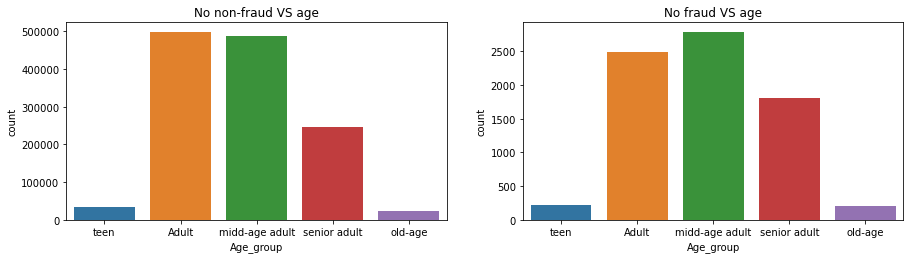

In [ ]:
# subplot 1
plt.figure(figsize=(15, 8))
plt.subplot(2, 2, 1)
plt.title('No non-fraud VS age')
sns.countplot(target_0['Age_group'])


# subplot 2
plt.subplot(2, 2, 2)
plt.title('No fraud VS age')
sns.countplot(target_1['Age_group'])
plt.show()

In [ ]:
sample_df = df.sample(int(0.1* len(df)))

<AxesSubplot:xlabel='lat', ylabel='long'>

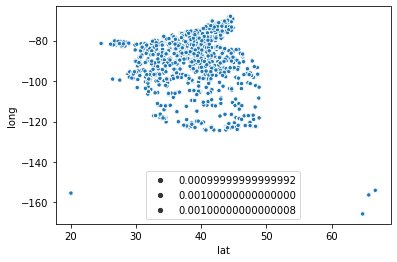

In [ ]:
# plt.figure(figsize = (15,8))
sns.scatterplot(x = sample_df.lat, y = sample_df.long, size = 0.001)

<AxesSubplot:xlabel='merch_lat', ylabel='merch_long'>

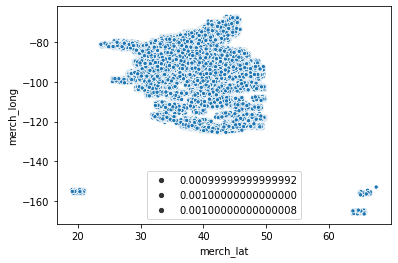

In [ ]:
sns.scatterplot(x = sample_df.merch_lat, y = sample_df.merch_long, size = 0.001)

In [ ]:
lat_lon = list(zip(list(sample_df.lat), list(sample_df.long)))

In [ ]:
# !pip install folium

In [ ]:
import folium

In [ ]:
from folium.plugins import HeatMap
map = folium.Map()
HeatMap(lat_lon).add_to(map)
map

In [ ]:
lat_long = list(zip(list(sample_df.merch_lat), list(sample_df.merch_long)))

In [ ]:
map = folium.Map()
HeatMap(lat_long).add_to(map)
map

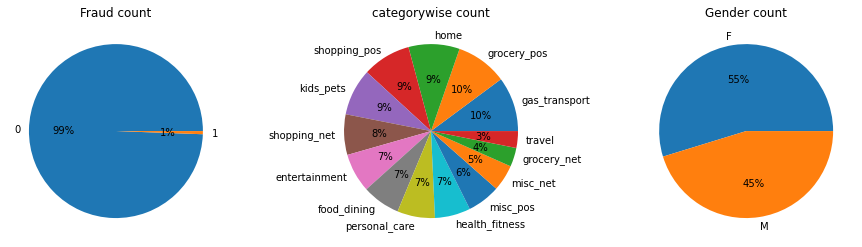

In [ ]:
plt.figure(figsize=(16,4))

plt.subplot(1,3,1)
plt.title("Fraud count")
plt.pie(df.is_fraud.value_counts(),labels=df.is_fraud.value_counts().index,autopct='%.0f%%')

plt.subplot(1,3,2)
plt.title("categorywise count")
plt.pie(df.category.value_counts(),labels=df.category.value_counts().index,autopct='%.0f%%')

plt.subplot(1,3,3)
plt.title("Gender count")
plt.pie(df.gender.value_counts(),labels=df.gender.value_counts().index,autopct='%.0f%%')
plt.show()

In [ ]:
# age = [13,19,39,59,80,100]
# stages = ['Teen', 'Adult','Midd Age Adult','Senior Adult','Old Age']
# df['Age_range'] = pd.cut(df['Age'], bins=age, labels=stages, include_lowest=True)

* Here we see that there is imbalance data that is 99% data of non-fraud and 1% data of fraud.
* From second pie chart, we can conclude that mostly credit card used in [gas_transport, grocery_pos, home] and least used in [travel, grocery_net].
* From the all transections we see that female users are more than the male users.

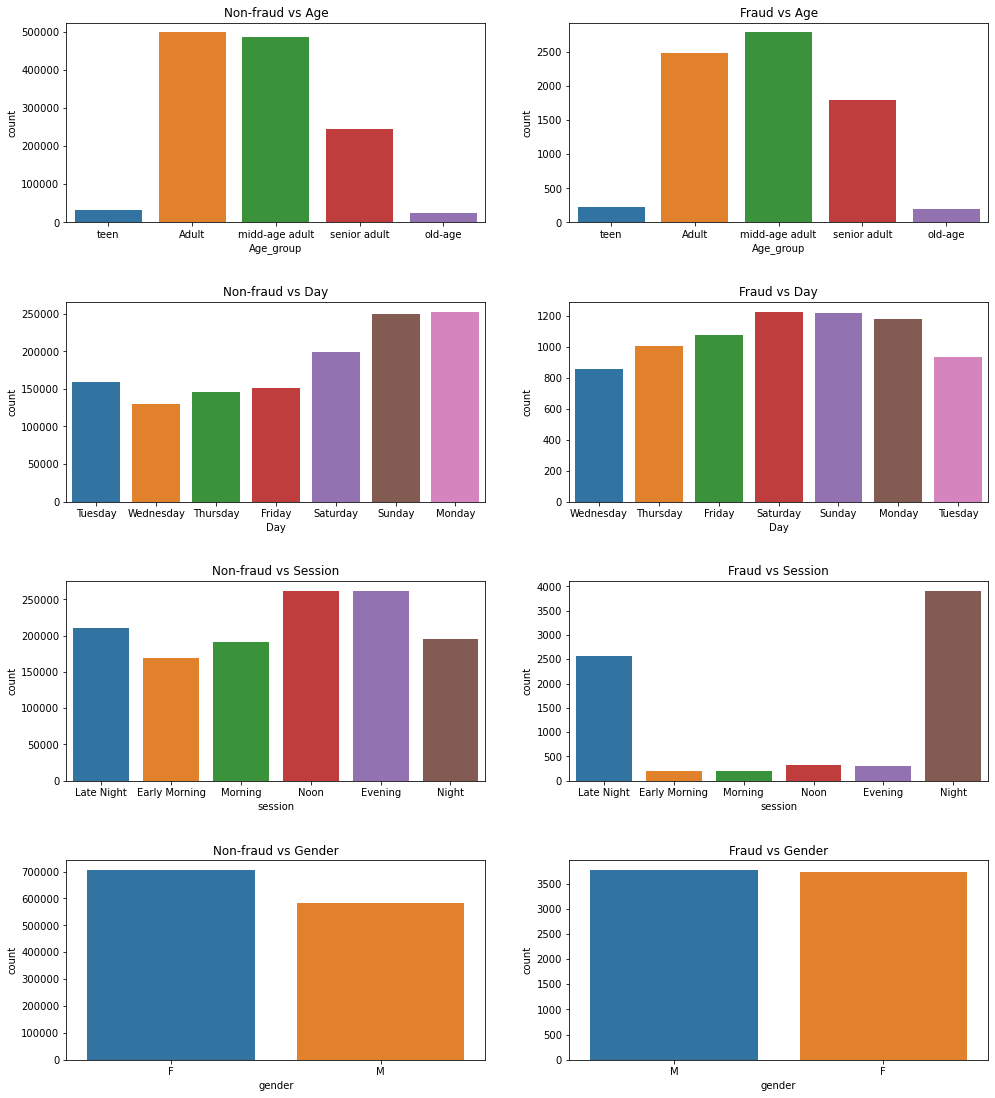

In [ ]:
plt.figure(figsize=(16,18))

plt.subplot(4,2,1)
plt.title("Non-fraud vs Age")
sns.countplot(x=target_0["Age_group"])

plt.subplot(4,2,2)
plt.title("Fraud vs Age")
sns.countplot(target_1["Age_group"])

plt.subplot(4,2,3)
plt.title("Non-fraud vs Day")
sns.countplot(target_0["Day"])

plt.subplot(4,2,4)
plt.title("Fraud vs Day")
sns.countplot(target_1["Day"])

plt.subplot(4,2,5)
plt.title("Non-fraud vs Session")
sns.countplot(target_0["session"])

plt.subplot(4,2,6)
plt.title("Fraud vs Session")
sns.countplot(target_1["session"])

plt.subplot(4,2,7)
plt.title("Non-fraud vs Gender")
sns.countplot(target_0["gender"])

plt.subplot(4,2,8)
plt.title("Fraud vs Gender")
sns.countplot(target_1["gender"])

# set the spacing between subplots
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.2, 
                    hspace=0.4)
plt.show()

        1. Maximum fraud was done with Middle_age adult and adult.
        2. Second subplot shows that the fraud happens mostly on weekend as compared to weekdays.
        3. From the third subplot we can conclude that the mostly fraud happens at night and late-night range.
        4. Fourth plot shows that there is no effect of gender on fraud and non-fraud data.

## Bivariate Analysis

Text(0.5, 1.0, 'TRANSACTION_AMT  vs  AGE FOR FRAUD')

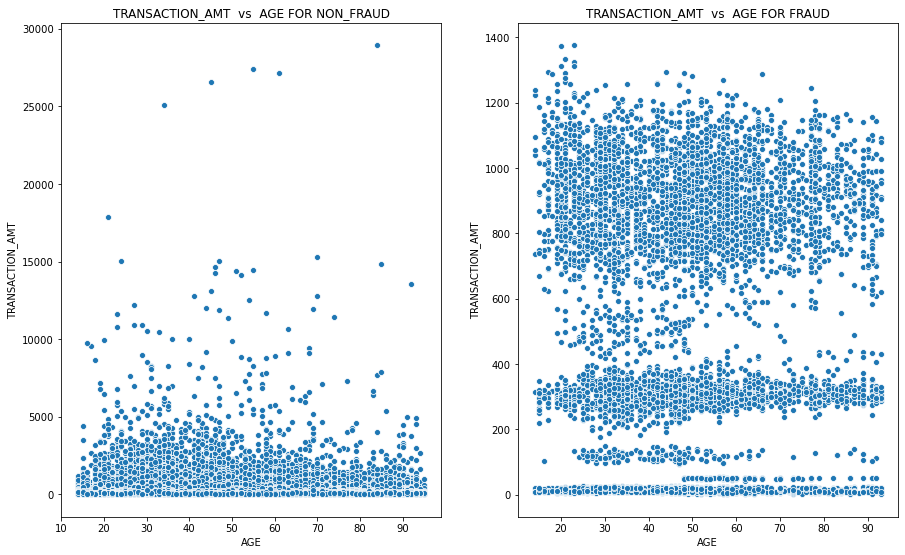

In [ ]:
#Scatter plot for numeric columns

plt.figure(figsize = (15, 20))

plt.subplot(2,2,1)
sns.scatterplot(target_0.Age,target_0.amt)
plt.ylabel('TRANSACTION_AMT')
plt.xlabel('AGE')
plt.title('TRANSACTION_AMT  vs  AGE FOR NON_FRAUD')

plt.subplot(2,2,2)
sns.scatterplot(target_1.Age,target_1.amt)
plt.ylabel('TRANSACTION_AMT')
plt.xlabel('AGE')
plt.title('TRANSACTION_AMT  vs  AGE FOR FRAUD')

* The Number of Credit card fraud is directly proportional to the transection amount.

### TOP 10 FRAUD MERCHANT

Text(0.5, 1.0, 'TOP TEN FRAUD MERCHANT')

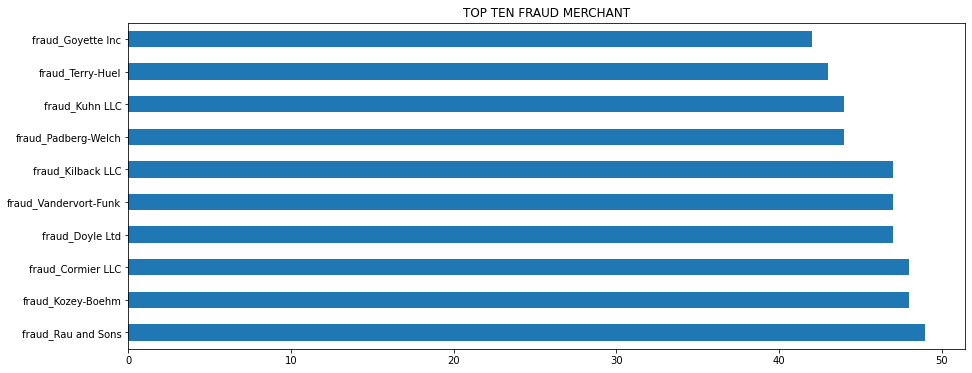

In [ ]:
plt.figure(figsize = (15, 6))
target_1['merchant'].value_counts().sort_values(ascending = False).head(10).plot(kind = 'barh')
plt.title('TOP TEN FRAUD MERCHANT')

Text(0.5, 1.0, 'TOP TEN CITIES WHERE FRAUD IS HAPPENED')

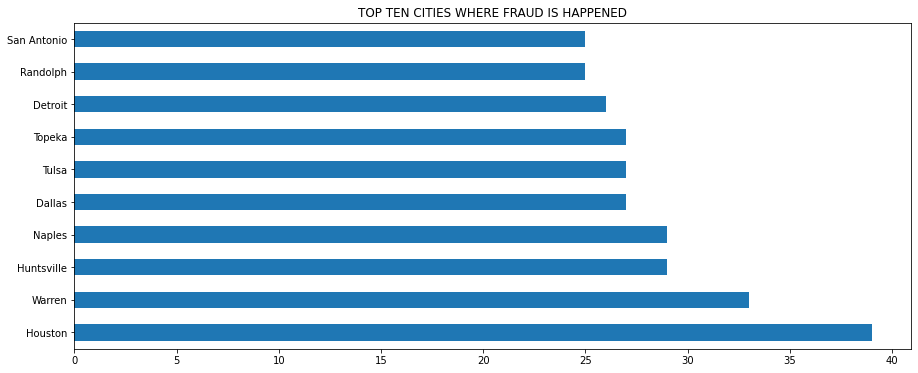

In [ ]:
plt.figure(figsize = (15, 6))
target_1['city'].value_counts().sort_values(ascending = False).head(10).plot(kind = 'barh')
plt.title('TOP TEN CITIES WHERE FRAUD IS HAPPENED')

* Most fraud is happened in Houston city

Text(0.5, 1.0, 'TOP TEN STATES WHERE FRAUD IS HAPPENED')

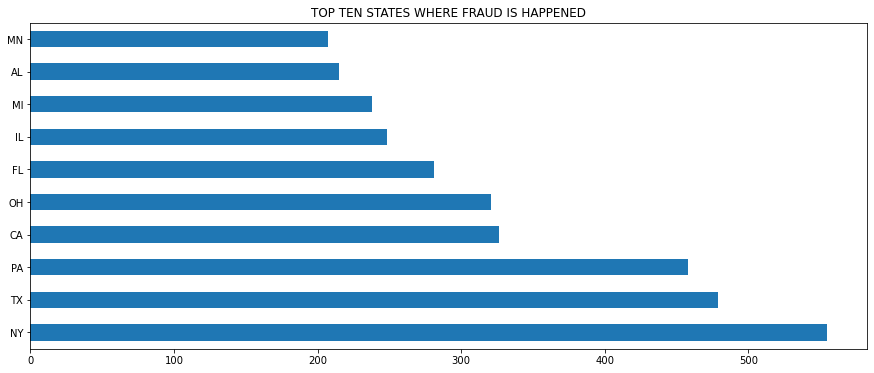

In [ ]:
plt.figure(figsize = (15, 6))
target_1['state'].value_counts().sort_values(ascending = False).head(10).plot(kind = 'barh')
plt.title('TOP TEN STATES WHERE FRAUD IS HAPPENED')

* Most fraud is happened in New York state

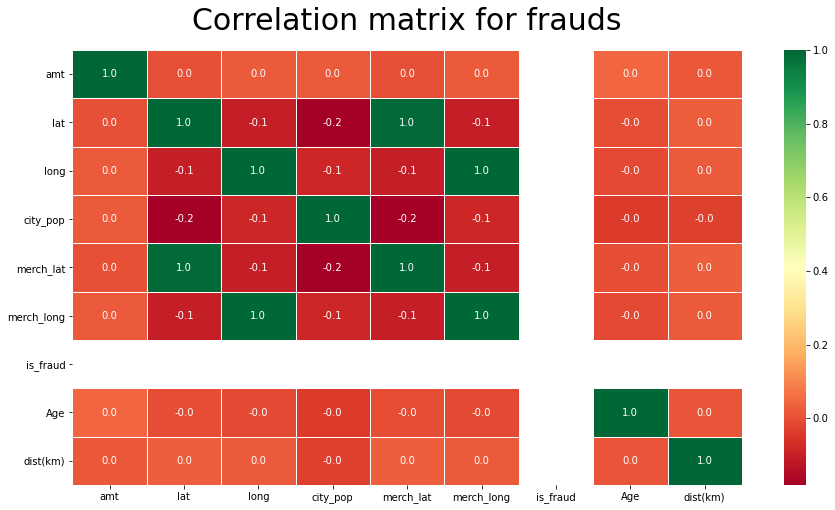

In [ ]:
f, ax = plt.subplots(figsize = (15, 8))
sns.heatmap(target_1.corr(), annot = True, fmt = '.1f', cmap = 'RdYlGn', linewidths = .5, ax = ax)
plt.title('Correlation matrix for frauds', fontsize = 30, pad = 20)
plt.show()

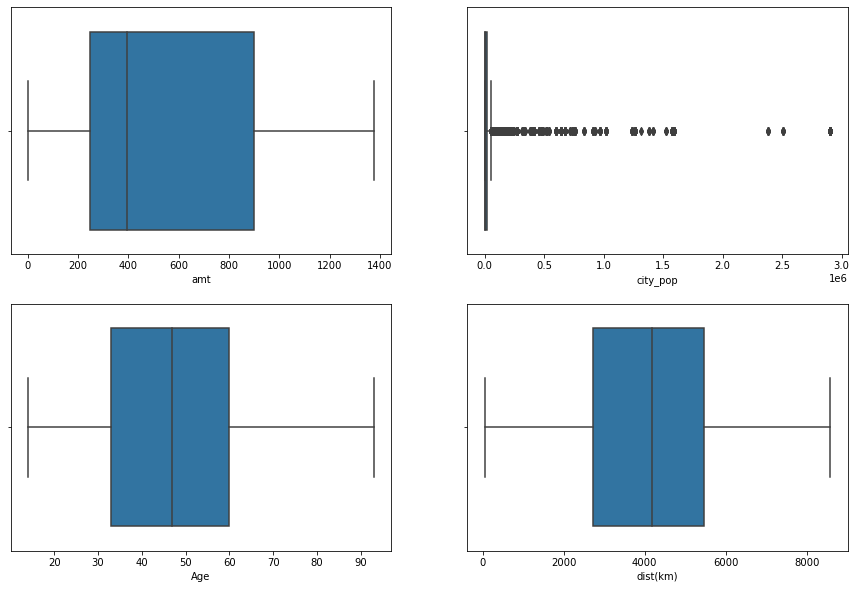

In [ ]:
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
sns.boxplot(target_1.amt)

plt.subplot(2,2,2)
sns.boxplot(target_1.city_pop)

plt.subplot(2,2,3)
sns.boxplot(target_1.Age)

plt.subplot(2,2,4)
sns.boxplot(target_1["dist(km)"])

plt.show()

In [ ]:
target_1.describe(percentiles = [0.80, 0.85, 0.90])

amt          lat         long      city_pop    merch_lat  \
count  7506.000000  7506.000000  7506.000000  7.506000e+03  7506.000000   
mean    531.320092    38.663609   -89.916041  9.727676e+04    38.653901   
std     390.560070     5.172289    14.278221  3.265815e+05     5.218387   
min       1.060000    20.027100  -165.672300  2.300000e+01    19.425114   
50%     396.505000    39.433600   -86.691900  2.623000e+03    39.427008   
80%     939.520000    42.691100   -78.110400  4.510000e+04    42.713055   
85%     980.202500    43.289300   -76.284200  1.176440e+05    43.443032   
90%    1024.595000    44.254100   -74.598200  2.035710e+05    44.281602   
max    1376.040000    66.693300   -68.556500  2.906700e+06    67.510267   

        merch_long  is_fraud          Age     dist(km)  
count  7506.000000    7506.0  7506.000000  7506.000000  
mean    -89.915808       1.0    48.326139  4054.760291  
std      14.298685       0.0    18.854249  1761.822388  
min    -166.550779       1.0    14.000000    42.418038  
50%     -86.813044       1.0    47.000000  4185.446106  
80%     -78.102174       1.0    64.000000  5714.376792  
85%     -76.377868       1.0    70.000000  5962.953507  
90%     -74.619936       1.0    77.000000  6245.399830  
max     -67.569238       1.0    93.000000  8585.740876

<AxesSubplot:title={'center':'Distance distribution plot'}, xlabel='dist(km)'>

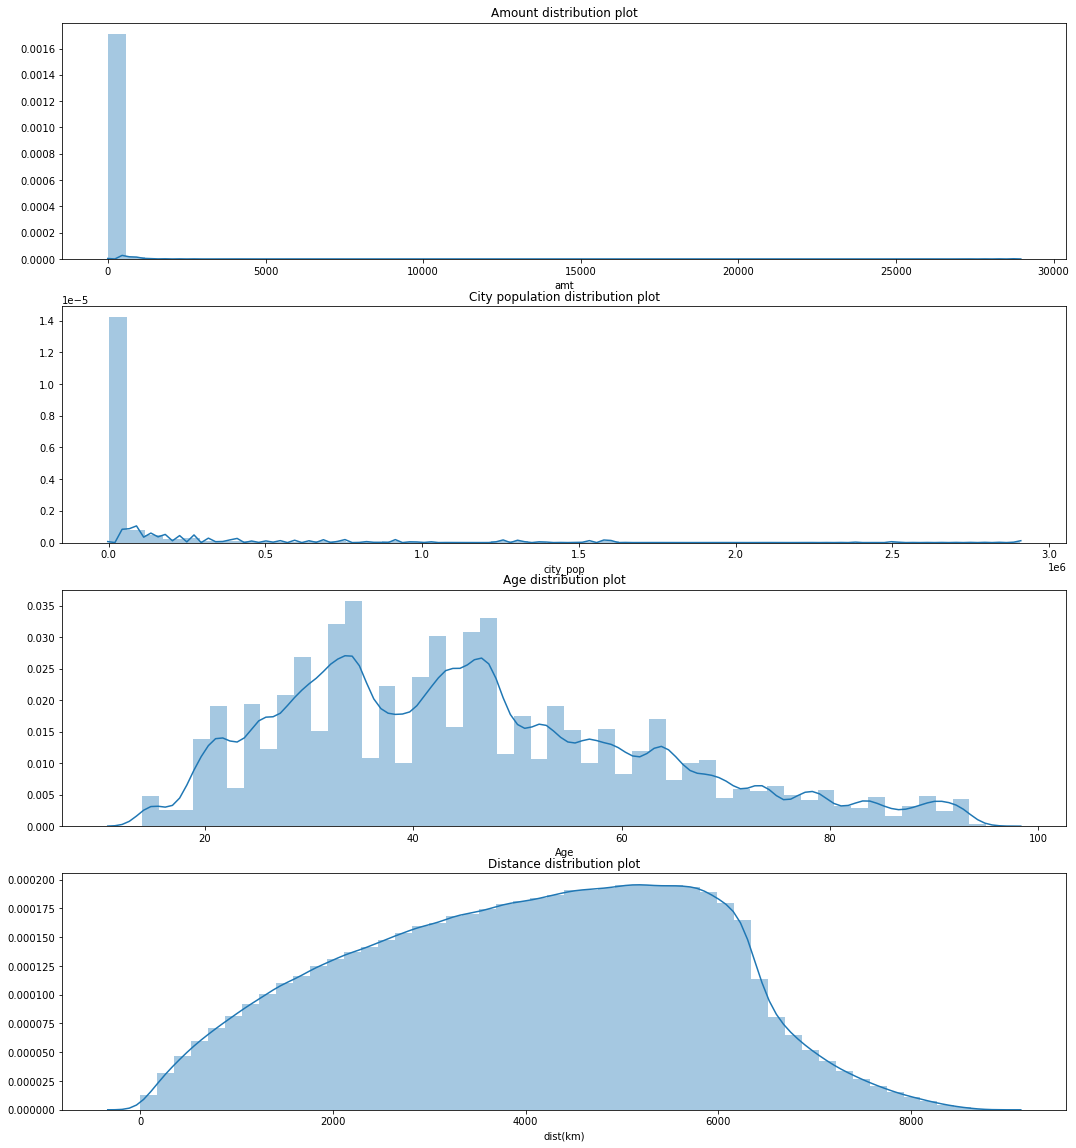

In [ ]:
plt.figure(figsize=(18,20))

plt.subplot(4,1,1)
plt.title('Amount distribution plot')
sns.distplot(df.amt)


plt.subplot(4,1,2)
plt.title('City population distribution plot')
sns.distplot(df.city_pop)

plt.subplot(4,1,3)
plt.title('Age distribution plot')
sns.distplot(df.Age)

plt.subplot(4,1,4)
plt.title('Distance distribution plot')
sns.distplot(df['dist(km)'])



**As the kernel density function clearly shows major skewness, treating the variable city_pop with boxcox transformations**

**No major skewness found in Distance and Age variables**

In [ ]:
from scipy import stats

In [ ]:
def diagnostic_plots (df, variable):
    #function to plot a histogram and a Q-Q plot #side by side, for a certain variable
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df[variable].hist()
    plt.subplot(1, 2, 2)
    stats.probplot(df [variable], dist="norm", plot=plt)
    plt.show()

<Figure size 864x360 with 0 Axes>

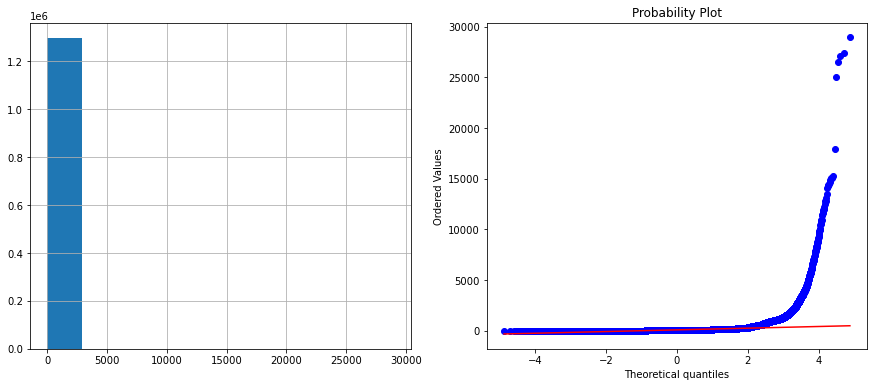

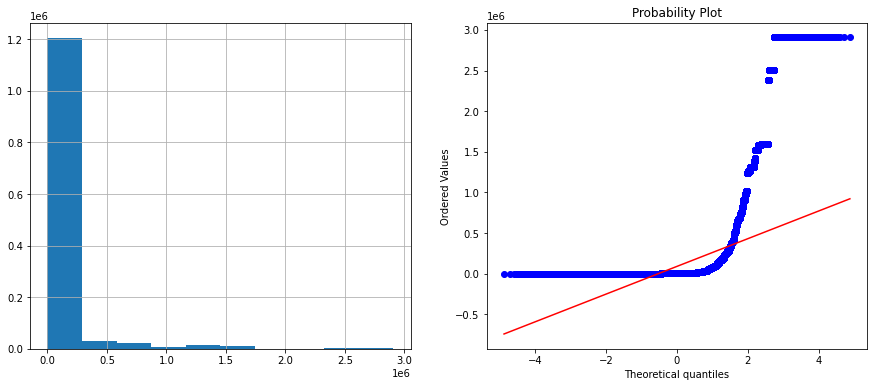

In [ ]:
plt.figure(figsize = (12,5))

# plt.subplot(3, 1, 1)
diagnostic_plots(df, 'amt')

# plt.subplot(3, 1, 3)
# diagnostic_plots(df, 'dist(km)')

diagnostic_plots(df, 'city_pop')

plt.show()

Optimal lambda:  0.09612774100181984


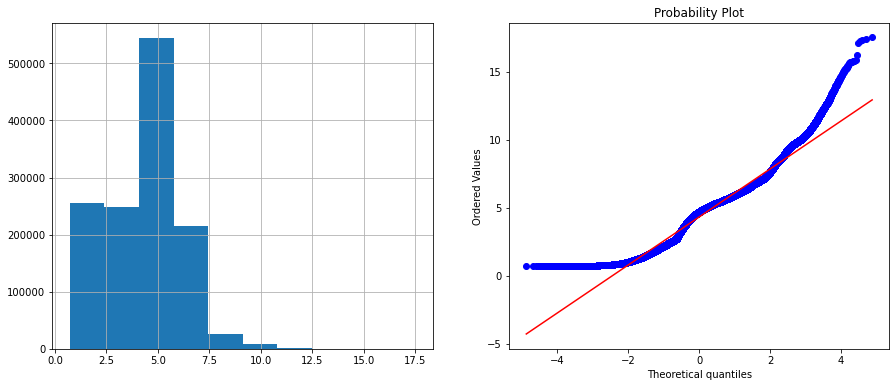

Optimal lambda:  -0.11022820194754346


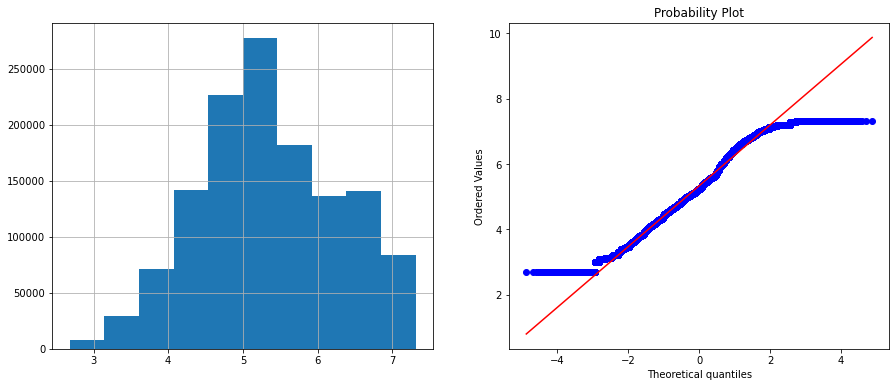

In [ ]:
df['amt_boxcox'], param = stats.boxcox(df.amt+1)
print("Optimal lambda: " , param)
diagnostic_plots (df, "amt_boxcox")


df['citypop_boxcox'], param = stats.boxcox(df['city_pop']+1)
print("Optimal lambda: " , param)
diagnostic_plots (df, "citypop_boxcox")

In [ ]:
df.head(2)

trans_date_trans_time                         merchant     category     amt  \
0   2019-01-01 00:00:18       fraud_Rippin, Kub and Mann     misc_net    4.97   
1   2019-01-01 00:00:44  fraud_Heller, Gutmann and Zieme  grocery_pos  107.23   

  gender            city state      lat      long  city_pop  \
0      F  Moravian Falls    NC  36.0788  -81.1781      3495   
1      F          Orient    WA  48.8878 -118.2105       149   

                                 job        dob  merch_lat  merch_long  \
0          Psychologist, counselling 1988-03-09  36.011293  -82.048315   
1  Special educational needs teacher 1978-06-21  49.159047 -118.186462   

   is_fraud      Day     session  Age     dist(km)       Age_group  \
0         0  Tuesday  Late Night   30   593.174456           Adult   
1         0  Tuesday  Late Night   40  1728.704973  midd-age adult   

   amt_boxcox  citypop_boxcox  
0    1.949365        5.381414  
1    5.916738        3.850043

In [ ]:
df.columns

Index(['trans_date_trans_time', 'merchant', 'category', 'amt', 'gender',
       'city', 'state', 'lat', 'long', 'city_pop', 'job', 'dob', 'merch_lat',
       'merch_long', 'is_fraud', 'Day', 'session', 'Age', 'dist(km)',
       'Age_group', 'amt_boxcox', 'citypop_boxcox'],
      dtype='object')

In [ ]:
# m = ["fraud_Rau and Sons","fraud_Kozey-Boehm","fraud_Cormier LLC","fraud_Doyle Ltd",
#      "fraud_Vandervort-Funk","fraud_Kilback LLC","fraud_Padberg-Welch","fraud_Kuhn LLC",
#      "fraud_Terry-Huel","fraud_Goyette Inc"]

In [ ]:
# for i in df['merchant']:
#     if i in m:
#         pass
#     else:
#         df['merchant'].replace(i, 'other', inplace = True)

In [ ]:
# len(df['merchant'].unique())

In [ ]:
df.head(2)

trans_date_trans_time                         merchant     category     amt  \
0   2019-01-01 00:00:18       fraud_Rippin, Kub and Mann     misc_net    4.97   
1   2019-01-01 00:00:44  fraud_Heller, Gutmann and Zieme  grocery_pos  107.23   

  gender            city state      lat      long  city_pop  \
0      F  Moravian Falls    NC  36.0788  -81.1781      3495   
1      F          Orient    WA  48.8878 -118.2105       149   

                                 job        dob  merch_lat  merch_long  \
0          Psychologist, counselling 1988-03-09  36.011293  -82.048315   
1  Special educational needs teacher 1978-06-21  49.159047 -118.186462   

   is_fraud      Day     session  Age     dist(km)       Age_group  \
0         0  Tuesday  Late Night   30   593.174456           Adult   
1         0  Tuesday  Late Night   40  1728.704973  midd-age adult   

   amt_boxcox  citypop_boxcox  
0    1.949365        5.381414  
1    5.916738        3.850043

In [ ]:
# s = ['NY', 'TX', 'PA', 'CA', 'OH', 'FL', 'IL', 'MI', 'AL', 'MN']

In [ ]:
# len(df)

In [ ]:
# for i in df['state']:
#     if i in s:
#         pass
#     else:
#         df['state'].replace(i, 'other', inplace = True)

In [ ]:
# len(df['state'].unique())

In [ ]:
# df['state'].value_counts()

In [ ]:
# df.head(2)

In [ ]:
df['gender'].replace('F', 1, inplace = True)
df['gender'].replace('M', 0, inplace = True)

In [ ]:
df.gender.value_counts()

1    709863
0    586812
Name: gender, dtype: int64

In [ ]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(df[['category', 'Day','session']], drop_first=True)

# Adding the results to the master dataframe
df = pd.concat([df, dummy1], axis=1)

In [ ]:
df.head(2)

trans_date_trans_time                         merchant     category     amt  \
0   2019-01-01 00:00:18       fraud_Rippin, Kub and Mann     misc_net    4.97   
1   2019-01-01 00:00:44  fraud_Heller, Gutmann and Zieme  grocery_pos  107.23   

   gender            city state      lat      long  city_pop  \
0       1  Moravian Falls    NC  36.0788  -81.1781      3495   
1       1          Orient    WA  48.8878 -118.2105       149   

                                 job        dob  merch_lat  merch_long  \
0          Psychologist, counselling 1988-03-09  36.011293  -82.048315   
1  Special educational needs teacher 1978-06-21  49.159047 -118.186462   

   is_fraud      Day     session  Age     dist(km)       Age_group  \
0         0  Tuesday  Late Night   30   593.174456           Adult   
1         0  Tuesday  Late Night   40  1728.704973  midd-age adult   

   amt_boxcox  citypop_boxcox  category_food_dining  category_gas_transport  \
0    1.949365        5.381414                     0                       0   
1    5.916738        3.850043                     0                       0   

   category_grocery_net  category_grocery_pos  category_health_fitness  \
0                     0                     0                        0   
1                     0                     1                        0   

   category_home  category_kids_pets  category_misc_net  category_misc_pos  \
0              0                   0                  1                  0   
1              0                   0                  0                  0   

   category_personal_care  category_shopping_net  category_shopping_pos  \
0                       0                      0                      0   
1                       0                      0                      0   

   category_travel  Day_Monday  Day_Saturday  Day_Sunday  Day_Thursday  \
0                0           0             0           0             0   
1                0           0             0           0             0   

   Day_Tuesday  Day_Wednesday  session_Early Morning  session_Morning  \
0            1              0                      0                0   
1            1              0                      0                0   

   session_Noon  session_Evening  session_Night  
0             0                0              0  
1             0                0              0

In [ ]:
df.shape

(1296675, 46)

In [ ]:
# Deleting unneccesary columns

df.drop(['trans_date_trans_time',  'amt', 'merchant', 'category', 'city', 
         'state', 'lat', 'long', 'Day', 'city_pop', 
        'job', 'dob', 'merch_lat', 'merch_long', 'Age_group', 'session'], axis = 1, inplace = True)

In [ ]:
df.head(2)

gender  is_fraud  Age     dist(km)  amt_boxcox  citypop_boxcox  \
0       1         0   30   593.174456    1.949365        5.381414   
1       1         0   40  1728.704973    5.916738        3.850043   

   category_food_dining  category_gas_transport  category_grocery_net  \
0                     0                       0                     0   
1                     0                       0                     0   

   category_grocery_pos  category_health_fitness  category_home  \
0                     0                        0              0   
1                     1                        0              0   

   category_kids_pets  category_misc_net  category_misc_pos  \
0                   0                  1                  0   
1                   0                  0                  0   

   category_personal_care  category_shopping_net  category_shopping_pos  \
0                       0                      0                      0   
1                       0                      0                      0   

   category_travel  Day_Monday  Day_Saturday  Day_Sunday  Day_Thursday  \
0                0           0             0           0             0   
1                0           0             0           0             0   

   Day_Tuesday  Day_Wednesday  session_Early Morning  session_Morning  \
0            1              0                      0                0   
1            1              0                      0                0   

   session_Noon  session_Evening  session_Night  
0             0                0              0  
1             0                0              0

In [ ]:
df.shape

(1296675, 30)

In [ ]:
df.describe()

gender      is_fraud           Age      dist(km)    amt_boxcox  \
count  1.296675e+06  1.296675e+06  1.296675e+06  1.296675e+06  1.296675e+06   
mean   5.474487e-01  5.788652e-03  4.553778e+01  4.024407e+03  4.318903e+00   
std    4.977437e-01  7.586269e-02  1.739607e+01  1.771169e+03  1.794031e+00   
min    0.000000e+00  0.000000e+00  1.400000e+01  1.169456e+00  7.167612e-01   
25%    0.000000e+00  0.000000e+00  3.200000e+01  2.659458e+03  2.656120e+00   
50%    1.000000e+00  0.000000e+00  4.400000e+01  4.133893e+03  4.705456e+00   
75%    1.000000e+00  0.000000e+00  5.700000e+01  5.437278e+03  5.526502e+00   
max    1.000000e+00  1.000000e+00  9.500000e+01  8.801952e+03  1.752514e+01   

       citypop_boxcox  category_food_dining  category_gas_transport  \
count    1.296675e+06          1.296675e+06            1.296675e+06   
mean     5.336195e+00          7.053502e-02            1.015359e-01   
std      9.365140e-01          2.560466e-01            3.020371e-01   
min      2.681085e+00          0.000000e+00            0.000000e+00   
25%      4.695064e+00          0.000000e+00            0.000000e+00   
50%      5.235113e+00          0.000000e+00            0.000000e+00   
75%      6.032384e+00          0.000000e+00            0.000000e+00   
max      7.313119e+00          1.000000e+00            1.000000e+00   

       category_grocery_net  category_grocery_pos  category_health_fitness  \
count          1.296675e+06          1.296675e+06             1.296675e+06   
mean           3.505273e-02          9.535003e-02             6.623017e-02   
std            1.839132e-01          2.936979e-01             2.486841e-01   
min            0.000000e+00          0.000000e+00             0.000000e+00   
25%            0.000000e+00          0.000000e+00             0.000000e+00   
50%            0.000000e+00          0.000000e+00             0.000000e+00   
75%            0.000000e+00          0.000000e+00             0.000000e+00   
max            1.000000e+00          1.000000e+00             1.000000e+00   

       category_home  category_kids_pets  category_misc_net  \
count   1.296675e+06        1.296675e+06       1.296675e+06   
mean    9.494669e-02        8.717296e-02       4.880714e-02   
std     2.931414e-01        2.820885e-01       2.154647e-01   
min     0.000000e+00        0.000000e+00       0.000000e+00   
25%     0.000000e+00        0.000000e+00       0.000000e+00   
50%     0.000000e+00        0.000000e+00       0.000000e+00   
75%     0.000000e+00        0.000000e+00       0.000000e+00   
max     1.000000e+00        1.000000e+00       1.000000e+00   

       category_misc_pos  category_personal_care  category_shopping_net  \
count       1.296675e+06            1.296675e+06           1.296675e+06   
mean        6.143020e-02            6.999287e-02           7.522548e-02   
std         2.401178e-01            2.551351e-01           2.637549e-01   
min         0.000000e+00            0.000000e+00           0.000000e+00   
25%         0.000000e+00            0.000000e+00           0.000000e+00   
50%         0.000000e+00            0.000000e+00           0.000000e+00   
75%         0.000000e+00            0.000000e+00           0.000000e+00   
max         1.000000e+00            1.000000e+00           1.000000e+00   

       category_shopping_pos  category_travel    Day_Monday  Day_Saturday  \
count           1.296675e+06     1.296675e+06  1.296675e+06  1.296675e+06   
mean            8.997783e-02     3.123913e-02  1.961031e-01  1.549787e-01   
std             2.861501e-01     1.739634e-01  3.970476e-01  3.618845e-01   
min             0.000000e+00     0.000000e+00  0.000000e+00  0.000000e+00   
25%             0.000000e+00     0.000000e+00  0.000000e+00  0.000000e+00   
50%             0.000000e+00     0.000000e+00  0.000000e+00  0.000000e+00   
75%             0.000000e+00     0.000000e+00  0.000000e+00  0.000000e+00   
max             1.000000e+00     1.000000e+00  1.000000e+00  1.000000e+00   

         Day_Sunday 

# Preprocessing on Testing data

In [ ]:
pd.set_option('display.max_columns', 300)
pd.set_option('display.max_rows', 300)
pd.set_option('display.max_colwidth', 300)

In [ ]:
test = pd.read_csv(r'C:\Users\Administrator\Intern\credit_card_fraud_detection\fraudTest.csv')
test.head()

Unnamed: 0 trans_date_trans_time            cc_num  \
0           0   2020-06-21 12:14:25  2291163933867244   
1           1   2020-06-21 12:14:33  3573030041201292   
2           2   2020-06-21 12:14:53  3598215285024754   
3           3   2020-06-21 12:15:15  3591919803438423   
4           4   2020-06-21 12:15:17  3526826139003047   

                               merchant        category    amt   first  \
0                 fraud_Kirlin and Sons   personal_care   2.86    Jeff   
1                  fraud_Sporer-Keebler   personal_care  29.84  Joanne   
2  fraud_Swaniawski, Nitzsche and Welch  health_fitness  41.28  Ashley   
3                     fraud_Haley Group        misc_pos  60.05   Brian   
4                 fraud_Johnston-Casper          travel   3.19  Nathan   

       last gender                       street        city state    zip  \
0   Elliott      M            351 Darlene Green    Columbia    SC  29209   
1  Williams      F             3638 Marsh Union     Altonah    UT  84002   
2     Lopez      F         9333 Valentine Point    Bellmore    NY  11710   
3  Williams      M  32941 Krystal Mill Apt. 552  Titusville    FL  32780   
4    Massey      M     5783 Evan Roads Apt. 465    Falmouth    MI  49632   

       lat      long  city_pop                     job         dob  \
0  33.9659  -80.9355    333497     Mechanical engineer  1968-03-19   
1  40.3207 -110.4360       302  Sales professional, IT  1990-01-17   
2  40.6729  -73.5365     34496       Librarian, public  1970-10-21   
3  28.5697  -80.8191     54767            Set designer  1987-07-25   
4  44.2529  -85.0170      1126      Furniture designer  1955-07-06   

                          trans_num   unix_time  merch_lat  merch_long  \
0  2da90c7d74bd46a0caf3777415b3ebd3  1371816865  33.986391  -81.200714   
1  324cc204407e99f51b0d6ca0055005e7  1371816873  39.450498 -109.960431   
2  c81755dbbbea9d5c77f094348a7579be  1371816893  40.495810  -74.196111   
3  2159175b9efe66dc301f149d3d5abf8c  1371816915  28.812398  -80.883061   
4  57ff021bd3f328f8738bb535c302a31b  1371816917  44.959148  -85.884734   

   is_fraud  
0         0  
1         0  
2         0  
3         0  
4         0

In [ ]:
# Making copy of test data
df_test_copy = test.copy()

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  int64  
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

In [ ]:
test.shape

(555719, 23)

In [ ]:
# here we convert the column 'trans_date_trans_time' to datetime
test['trans_date_trans_time'] =  pd.to_datetime(test['trans_date_trans_time'], format='%Y-%m-%d %H:%M:%S.%f')

In [ ]:
# getting the corresponding day of date
test['Day'] = test['trans_date_trans_time'].dt.day_name()
test['Day']

0           Sunday
1           Sunday
2           Sunday
3           Sunday
4           Sunday
            ...   
555714    Thursday
555715    Thursday
555716    Thursday
555717    Thursday
555718    Thursday
Name: Day, Length: 555719, dtype: object

In [ ]:
# for make different sessions we are taking only Hour's from the 'trans_date_trans_time' column
test['Hours'] = test['trans_date_trans_time'].dt.hour

In [ ]:
# Partitioning the day into 6 different sessions
b = [0,4,8,12,16,20,23]
l = ['Late Night', 'Early Morning','Morning','Noon','Evening','Night']
test['session'] = pd.cut(test['Hours'], bins=b, labels=l, include_lowest=True)

In [ ]:
# we used 'Hours' column to make different session and it's work is over so we are deleting it
# the columns are not usable so we are droping it
test.drop(['Hours','Unnamed: 0','cc_num', 'first', 'last', 'zip','unix_time','trans_num', 'street'],axis = 1, inplace = True)

In [ ]:
# here we convert the column 'dob' to datetime
test['dob'] =  pd.to_datetime(test['dob'], format='%Y-%m-%d')

In [ ]:
# calculating age from the column 'dob' and 'trans_date_trans_time'
test['Age'] = (test['trans_date_trans_time'].dt.year - test['dob'].dt.year) - ((test['trans_date_trans_time'].dt.month - test['dob'].dt.month) < 0)

In [ ]:
# calculating distace of person from the merchant from latitude and longitude

# vectorized haversine function
def haversine(lat1, lon1, lat2, lon2, to_radians=True, earth_radius=6371):
    """
    slightly modified version: of http://stackoverflow.com/a/29546836/2901002

    Calculate the great circle distance between two points
    on the earth (specified in decimal degrees or in radians)

    All (lat, lon) coordinates must have numeric dtypes and be of equal length.
    """
    if to_radians:
        lat1, lon1, lat2, lon2 = test['lat'], test['long'], test['merch_lat'], test['merch_long']

    a = np.sin((lat2-lat1)/2.0)**2 + \
        np.cos(lat1) * np.cos(lat2) * np.sin((lon2-lon1)/2.0)**2

    return earth_radius * 2 * np.arcsin(np.sqrt(a))

test['dist(km)'] = \
    haversine(test.lat.shift(), test.long.shift(),
                 test.loc[1:, 'lat'], test.loc[1:, 'long'])

In [ ]:
b = [13,19,39,59,88,100]
l = ['teen', 'Adult', 'midd-age adult', 'senior adult', 'old-age']
test['Age_group'] = pd.cut(test['Age'], bins=b, labels=l, include_lowest=True)

In [ ]:
# Transforming data using boxcox transformation

test['amt_boxcox'], param = stats.boxcox(test.amt+1)
test['citypop_boxcox'], param = stats.boxcox(test['city_pop']+1)

In [ ]:
# m = ["fraud_Rau and Sons","fraud_Kozey-Boehm","fraud_Cormier LLC","fraud_Doyle Ltd",
#      "fraud_Vandervort-Funk","fraud_Kilback LLC","fraud_Padberg-Welch","fraud_Kuhn LLC",
#      "fraud_Terry-Huel","fraud_Goyette Inc"]

In [ ]:
# for i in test['merchant']:
#     if i in m:
#         pass
#     else:
#         test['merchant'].replace(i, 'other', inplace = True)

In [ ]:
# len(test['merchant'].unique())

In [ ]:
test['gender'].replace('F', 1, inplace = True)
test['gender'].replace('M', 0, inplace = True)

In [ ]:
# s = ['NY', 'TX', 'PA', 'CA', 'OH', 'FL', 'IL', 'MI', 'AL', 'MN']

In [ ]:
# for i in test['state']:
#     if i in s:
#         pass
#     else:
#         test['state'].replace(i, 'other', inplace = True)

In [ ]:
# len(test['state'].unique())

In [ ]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(test[['category','Day','session']], drop_first=True)

# Adding the results to the master dataframe
test = pd.concat([test, dummy1], axis=1)

In [ ]:
# Deleting unneccesary columns

test.drop(['trans_date_trans_time',  'amt', 'merchant', 'category', 'city', 
         'state', 'lat', 'long', 'Day', 'city_pop', 
        'job', 'dob', 'merch_lat', 'merch_long', 'Age_group', 'session'], axis = 1, inplace = True)

In [ ]:
test.head(2)

gender  is_fraud  Age     dist(km)  amt_boxcox  citypop_boxcox  \
0       0         0   52  1416.796144    1.447202        6.801991   
1       1         0   30  5686.866950    4.097965        4.227515   

   category_food_dining  category_gas_transport  category_grocery_net  \
0                     0                       0                     0   
1                     0                       0                     0   

   category_grocery_pos  category_health_fitness  category_home  \
0                     0                        0              0   
1                     0                        0              0   

   category_kids_pets  category_misc_net  category_misc_pos  \
0                   0                  0                  0   
1                   0                  0                  0   

   category_personal_care  category_shopping_net  category_shopping_pos  \
0                       1                      0                      0   
1                       1                      0                      0   

   category_travel  Day_Monday  Day_Saturday  Day_Sunday  Day_Thursday  \
0                0           0             0           1             0   
1                0           0             0           1             0   

   Day_Tuesday  Day_Wednesday  session_Early Morning  session_Morning  \
0            0              0                      0                1   
1            0              0                      0                1   

   session_Noon  session_Evening  session_Night  
0             0                0              0  
1             0                0              0

In [ ]:
test.shape

(555719, 30)

In [ ]:
test_label = test['is_fraud']
test_label.head()

0    0
1    0
2    0
3    0
4    0
Name: is_fraud, dtype: int64

In [ ]:
test_feature = test.copy()
test_feature = test_feature.drop('is_fraud', axis = 1)
test_feature.head()

gender  Age     dist(km)  amt_boxcox  citypop_boxcox  category_food_dining  \
0       0   52  1416.796144    1.447202        6.801991                     0   
1       1   30  5686.866950    4.097965        4.227515                     0   
2       1   49  4207.717100    4.551333        6.175533                     0   
3       0   32  1590.150812    5.097792        6.316310                     0   
4       0   64  6141.936388    1.541625        4.874392                     0   

   category_gas_transport  category_grocery_net  category_grocery_pos  \
0                       0                     0                     0   
1                       0                     0                     0   
2                       0                     0                     0   
3                       0                     0                     0   
4                       0                     0                     0   

   category_health_fitness  category_home  category_kids_pets  \
0                        0              0                   0   
1                        0              0                   0   
2                        1              0                   0   
3                        0              0                   0   
4                        0              0                   0   

   category_misc_net  category_misc_pos  category_personal_care  \
0                  0                  0                       1   
1                  0                  0                       1   
2                  0                  0                       0   
3                  0                  1                       0   
4                  0                  0                       0   

   category_shopping_net  category_shopping_pos  category_travel  Day_Monday  \
0                      0                      0                0           0   
1                      0                      0                0           0   
2                      0                      0                0           0   
3                      0                      0                0           0   
4                      0                      0                1           0   

   Day_Saturday  Day_Sunday  Day_Thursday  Day_Tuesday  Day_Wednesday  \
0             0           1             0            0              0   
1             0           1             0            0              0   
2             0           1             0            0              0   
3             0           1             0            0              0   
4             0           1             0            0              0   

   session_Early Morning  session_Morning  session_Noon  session_Evening  \
0                      0                1             0                0   
1                      0                1             0                0   
2                      0                1             0                0   
3                      0                1             0                0   
4                      0                1             0                0   

   session_Night  
0              0  
1              0  
2              0  
3              0  
4              0

# Modeling

## Rfe : Recursive Feature Elemenation

### Feature Scaling

In [ ]:
# putting feature variable to x
X_train = df.drop('is_fraud', 1)
X_train.head()

gender  Age     dist(km)  amt_boxcox  citypop_boxcox  category_food_dining  \
0       1   30   593.174456    1.949365        5.381414                     0   
1       1   40  1728.704973    5.916738        3.850043                     0   
2       0   57  6172.384834    7.076843        5.451004                     0   
3       0   52  5643.930319    4.628194        5.133879                     0   
4       0   32  3759.275670    4.529728        3.611356                     0   

   category_gas_transport  category_grocery_net  category_grocery_pos  \
0                       0                     0                     0   
1                       0                     0                     1   
2                       0                     0                     0   
3                       1                     0                     0   
4                       0                     0                     0   

   category_health_fitness  category_home  category_kids_pets  \
0                        0              0                   0   
1                        0              0                   0   
2                        0              0                   0   
3                        0              0                   0   
4                        0              0                   0   

   category_misc_net  category_misc_pos  category_personal_care  \
0                  1                  0                       0   
1                  0                  0                       0   
2                  0                  0                       0   
3                  0                  0                       0   
4                  0                  1                       0   

   category_shopping_net  category_shopping_pos  category_travel  Day_Monday  \
0                      0                      0                0           0   
1                      0                      0                0           0   
2                      0                      0                0           0   
3                      0                      0                0           0   
4                      0                      0                0           0   

   Day_Saturday  Day_Sunday  Day_Thursday  Day_Tuesday  Day_Wednesday  \
0             0           0             0            1              0   
1             0           0             0            1              0   
2             0           0             0            1              0   
3             0           0             0            1              0   
4             0           0             0            1              0   

   session_Early Morning  session_Morning  session_Noon  session_Evening  \
0                      0                0             0                0   
1                      0                0             0                0   
2                      0                0             0                0   
3                      0                0             0                0   
4                      0                0             0                0   

   session_Night  
0              0  
1              0  
2              0  
3              0  
4              0

In [ ]:
# putting response variable to y
y_train = df['is_fraud']
y_train.head()

0    0
1    0
2    0
3    0
4    0
Name: is_fraud, dtype: int64

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [ ]:
scaler = MinMaxScaler()
X_col = X_train.columns
X_train = scaler.fit_transform(X_train)
X_scale_final = pd.DataFrame(X_train, columns=X_col)
X_scale_final.head()

gender       Age  dist(km)  amt_boxcox  citypop_boxcox  \
0     1.0  0.197531  0.067267    0.073333        0.582968   
1     1.0  0.320988  0.196293    0.309368        0.252364   
2     0.0  0.530864  0.701212    0.378388        0.597992   
3     0.0  0.469136  0.641166    0.232707        0.529529   
4     0.0  0.222222  0.427020    0.226849        0.200834   

   category_food_dining  category_gas_transport  category_grocery_net  \
0                   0.0                     0.0                   0.0   
1                   0.0                     0.0                   0.0   
2                   0.0                     0.0                   0.0   
3                   0.0                     1.0                   0.0   
4                   0.0                     0.0                   0.0   

   category_grocery_pos  category_health_fitness  category_home  \
0                   0.0                      0.0            0.0   
1                   1.0                      0.0            0.0   
2                   0.0                      0.0            0.0   
3                   0.0                      0.0            0.0   
4                   0.0                      0.0            0.0   

   category_kids_pets  category_misc_net  category_misc_pos  \
0                 0.0                1.0                0.0   
1                 0.0                0.0                0.0   
2                 0.0                0.0                0.0   
3                 0.0                0.0                0.0   
4                 0.0                0.0                1.0   

   category_personal_care  category_shopping_net  category_shopping_pos  \
0                     0.0                    0.0                    0.0   
1                     0.0                    0.0                    0.0   
2                     0.0                    0.0                    0.0   
3                     0.0                    0.0                    0.0   
4                     0.0                    0.0                    0.0   

   category_travel  Day_Monday  Day_Saturday  Day_Sunday  Day_Thursday  \
0              0.0         0.0           0.0         0.0           0.0   
1              0.0         0.0           0.0         0.0           0.0   
2              0.0         0.0           0.0         0.0           0.0   
3              0.0         0.0           0.0         0.0           0.0   
4              0.0         0.0           0.0         0.0           0.0   

   Day_Tuesday  Day_Wednesday  session_Early Morning  session_Morning  \
0          1.0            0.0                    0.0              0.0   
1          1.0            0.0                    0.0              0.0   
2          1.0            0.0                    0.0              0.0   
3          1.0            0.0                    0.0              0.0   
4          1.0            0.0                    0.0              0.0   

   session_Noon  session_Evening  session_Night  
0           0.0              0.0            0.0  
1           0.0              0.0            0.0  
2           0.0              0.0            0.0  
3           0.0              0.0            0.0  
4           0.0              0.0            0.0

In [ ]:
#perform oversampling using smote
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 5, sampling_strategy = 1)

In [ ]:
X_train_smote, y_train_smote =  sm.fit_resample(X_train, y_train)

In [ ]:
print(X_train_smote.shape, y_train_smote.shape)

(2578338, 29) (2578338,)


Text(0.5, 1.0, 'Fraud')

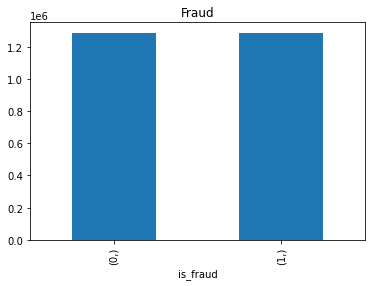

In [ ]:
pd.DataFrame(y_train_smote).value_counts().plot(kind = 'bar').set_title('Fraud')

In [ ]:
# transform test using the already fit scaler
test_feature = scaler.transform(test_feature)

## Feature Selection

In [ ]:
from sklearn.feature_selection import RFE

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(class_weight = 'balanced')
rfe = RFE(estimator=logreg, n_features_to_select=20)

In [ ]:
# logreg = LogisticRegression(random_state=100)

In [ ]:
# rfe = RFE(estimator=logreg, n_features_to_select=20)

In [ ]:
rfe.fit(X_train_smote, y_train_smote)

RFE(estimator=LogisticRegression(class_weight='balanced'),
    n_features_to_select=20)

In [ ]:
rfe.ranking_

array([ 7,  1, 10,  1,  5,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  2,  6,  3,  8,  4,  9,  1,  1,  1,  1,  1])

In [ ]:
rfe.support_

array([False,  True, False,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False, False, False, False, False, False,  True,  True,  True,
        True,  True])

In [ ]:
# columns=['amt_boxcox', 'category_gas_transport', 'category_grocery_net',
#        'category_grocery_pos', 'category_home', 'category_misc_net',
#        'category_misc_pos', 'category_personal_care', 'category_shopping_net',
#        'category_travel', 'session_Early Morning', 'session_Morning',
#        'session_Noon', 'session_Evening', 'session_Night']


In [ ]:
pd.DataFrame(X_train_smote).columns[rfe.support_]

Int64Index([1, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 24, 25, 26,
            27, 28],
           dtype='int64')

In [ ]:
a=list(X_scale_final.columns[rfe.support_])
a


['Age',
 'amt_boxcox',
 'category_food_dining',
 'category_gas_transport',
 'category_grocery_net',
 'category_grocery_pos',
 'category_health_fitness',
 'category_home',
 'category_kids_pets',
 'category_misc_net',
 'category_misc_pos',
 'category_personal_care',
 'category_shopping_net',
 'category_shopping_pos',
 'category_travel',
 'session_Early Morning',
 'session_Morning',
 'session_Noon',
 'session_Evening',
 'session_Night']

In [ ]:
X_train_df=pd.DataFrame(X_train_smote).loc[:,rfe.support_]

In [ ]:
X_train_df.head()

1         3    5    6    7    8    9    10   11   12   13   14   15  \
0  0.197531  0.073333  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0   
1  0.320988  0.309368  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  0.530864  0.378388  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  0.469136  0.232707  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4  0.222222  0.226849  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0   

    16   17   24   25   26   27   28  
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0

In [ ]:
X_train_df.columns= a
X_train_df.head()


Age  amt_boxcox  category_food_dining  category_gas_transport  \
0  0.197531    0.073333                   0.0                     0.0   
1  0.320988    0.309368                   0.0                     0.0   
2  0.530864    0.378388                   0.0                     0.0   
3  0.469136    0.232707                   0.0                     1.0   
4  0.222222    0.226849                   0.0                     0.0   

   category_grocery_net  category_grocery_pos  category_health_fitness  \
0                   0.0                   0.0                      0.0   
1                   0.0                   1.0                      0.0   
2                   0.0                   0.0                      0.0   
3                   0.0                   0.0                      0.0   
4                   0.0                   0.0                      0.0   

   category_home  category_kids_pets  category_misc_net  category_misc_pos  \
0            0.0                 0.0                1.0                0.0   
1            0.0                 0.0                0.0                0.0   
2            0.0                 0.0                0.0                0.0   
3            0.0                 0.0                0.0                0.0   
4            0.0                 0.0                0.0                1.0   

   category_personal_care  category_shopping_net  category_shopping_pos  \
0                     0.0                    0.0                    0.0   
1                     0.0                    0.0                    0.0   
2                     0.0                    0.0                    0.0   
3                     0.0                    0.0                    0.0   
4                     0.0                    0.0                    0.0   

   category_travel  session_Early Morning  session_Morning  session_Noon  \
0              0.0                    0.0              0.0           0.0   
1              0.0                    0.0              0.0           0.0   
2              0.0                    0.0              0.0           0.0   
3              0.0                    0.0              0.0           0.0   
4              0.0                    0.0              0.0           0.0   

   session_Evening  session_Night  
0              0.0            0.0  
1              0.0            0.0  
2              0.0            0.0  
3              0.0            0.0  
4              0.0            0.0

In [ ]:
X_test_df=pd.DataFrame(test_feature).loc[:,rfe.support_]

In [ ]:
X_test_df.columns= a
X_test_df.head()


Age  amt_boxcox  category_food_dining  category_gas_transport  \
0  0.469136    0.043457                   0.0                     0.0   
1  0.197531    0.201162                   0.0                     0.0   
2  0.432099    0.228135                   0.0                     0.0   
3  0.222222    0.260646                   0.0                     0.0   
4  0.617284    0.049075                   0.0                     0.0   

   category_grocery_net  category_grocery_pos  category_health_fitness  \
0                   0.0                   0.0                      0.0   
1                   0.0                   0.0                      0.0   
2                   0.0                   0.0                      1.0   
3                   0.0                   0.0                      0.0   
4                   0.0                   0.0                      0.0   

   category_home  category_kids_pets  category_misc_net  category_misc_pos  \
0            0.0                 0.0                0.0                0.0   
1            0.0                 0.0                0.0                0.0   
2            0.0                 0.0                0.0                0.0   
3            0.0                 0.0                0.0                1.0   
4            0.0                 0.0                0.0                0.0   

   category_personal_care  category_shopping_net  category_shopping_pos  \
0                     1.0                    0.0                    0.0   
1                     1.0                    0.0                    0.0   
2                     0.0                    0.0                    0.0   
3                     0.0                    0.0                    0.0   
4                     0.0                    0.0                    0.0   

   category_travel  session_Early Morning  session_Morning  session_Noon  \
0              0.0                    0.0              1.0           0.0   
1              0.0                    0.0              1.0           0.0   
2              0.0                    0.0              1.0           0.0   
3              0.0                    0.0              1.0           0.0   
4              1.0                    0.0              1.0           0.0   

   session_Evening  session_Night  
0              0.0            0.0  
1              0.0            0.0  
2              0.0            0.0  
3              0.0            0.0  
4              0.0            0.0

In [ ]:
# y_test_df= test['is_fraud']
# y_test_df.head()

In [ ]:
# Splitting the data into train and test
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [ ]:
#lets perform PCA on sampled data. import PCA
# from sklearn.decomposition import PCA
# pca = PCA(svd_solver='randomized', random_state=100)

In [ ]:
#lets fit PCA on the train dataset
# pca.fit(X_train_smote)

In [ ]:
#lets draw screeplot in between cumulative variance and number of components
# %matplotlib inline
# fig = plt.figure(figsize = (12,8))
# plt.plot(np.cumsum(pca.explained_variance_ratio_))
# plt.xlabel('number of components')
# plt.ylabel('cumulative explained variance')
# plt.show()

Plot shows that 23 components are enough to explain close to 95% variance

In [ ]:
#lets perform incremental PCA for efficiency 
# from sklearn.decomposition import IncrementalPCA
# pca_again = IncrementalPCA(n_components=23)

In [ ]:
#fit
# X_train_pca = pca_again.fit_transform(X_train_smote)
# X_train_pca = pca_again.fit_transform(X_train)
# X_train_pca.shape

In [ ]:
#lets create correlation matrix for the principal components
# corrmat = np.corrcoef(X_train_pca.transpose())
# corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
# print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)
# #correlations are close to 0

In [ ]:
#Applying selected components to the test data - 35 components
# X_test_pca = pca_again.transform(test_feature)
# X_test_pca.shape

## Modeling : Logistic Regression

In [ ]:
%%time
#import library and fit train model on train data
#class_weight="balanced":it basically means replicating the smaller class until you have as many samples as in the larger one, 
#but in an implicit way.Though we have already used smote but here we can use this too.
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
Lr = LogisticRegression(class_weight='balanced')
Lr.fit(X_train_df,y_train_smote)

CPU times: total: 17.3 s
Wall time: 15 s


LogisticRegression(class_weight='balanced')

In [ ]:
#Predict on training set
dtrain_predictions = Lr.predict(X_train_df)
dtrain_predprob = Lr.predict_proba(X_train_df)[:,1]

In [ ]:
#lets print some scores
print ("Accuracy :",metrics.roc_auc_score(y_train_smote, dtrain_predictions))
print ("Recall/Sensitivity :",metrics.recall_score(y_train_smote, dtrain_predictions))
print ("AUC Score (Train):",metrics.roc_auc_score(y_train_smote, dtrain_predprob))

Accuracy : 0.8131742230847934
Recall/Sensitivity : 0.8046718467477887
AUC Score (Train): 0.9241197098229885


In [ ]:
#lets predict on test dataset.
#print all scores
pred_probs_test = Lr.predict(X_test_df)
confusion = metrics.confusion_matrix(test_label, pred_probs_test)
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
print("Roc_auc_score :",(metrics.roc_auc_score(test_label, pred_probs_test)))
print('precision score:',(metrics.precision_score(test_label, pred_probs_test)))
print('Sensitivity/Recall :',(TP / float(TP+FN)))
print('Specificity:',(TN / float(TN+FP)))
print('False Positive Rate:',(FP/ float(TN+FP)))
print('Positive predictive value:',(TP / float(TP+FP)))
print('Negative Predictive value:',(TN / float(TN+ FN)))
print("Accuracy :",(metrics.accuracy_score(test_label,pred_probs_test)))

Roc_auc_score : 0.8045815227740318
precision score: 0.016534397974584936
Sensitivity/Recall : 0.7916083916083916
Specificity: 0.817554653939672
False Positive Rate: 0.18244534606032797
Positive predictive value: 0.016534397974584936
Negative Predictive value: 0.9990132973087519
Accuracy : 0.817454504884663


In [ ]:
#lets check with probability cutoff 0.5
y_train_pred = Lr.predict_proba(X_train_df)[:,1]
y_train_pred_final = pd.DataFrame({'Fraud':y_train_smote, 'Fraud_Prob':y_train_pred})
y_train_pred_final['Fraud_Prob'] = y_train_pred
y_train_pred_final['predicted'] = y_train_pred_final.Fraud_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

Fraud  Fraud_Prob  predicted
0      0    0.091809          0
1      0    0.706218          1
2      0    0.409133          0
3      0    0.737664          1
4      0    0.472161          0

In [ ]:
#lets define function for ROC curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Fraud, y_train_pred_final.Fraud_Prob, drop_intermediate = False )

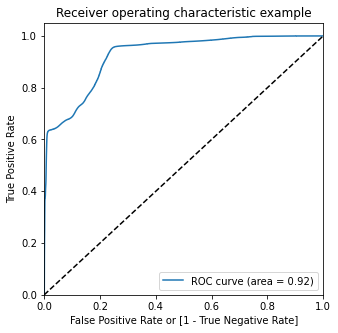

In [ ]:
#lets draw roc curve
draw_roc(y_train_pred_final.Fraud, y_train_pred_final.Fraud_Prob)

In [ ]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Fraud_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

Fraud  Fraud_Prob  predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  \
0      0    0.091809          0    1    0    0    0    0    0    0    0    0   
1      0    0.706218          1    1    1    1    1    1    1    1    1    0   
2      0    0.409133          0    1    1    1    1    1    0    0    0    0   
3      0    0.737664          1    1    1    1    1    1    1    1    1    0   
4      0    0.472161          0    1    1    1    1    1    0    0    0    0   

   0.9  
0    0  
1    0  
2    0  
3    0  
4    0

In [ ]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Fraud, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.500000  1.000000  0.000000
0.1   0.1  0.730484  0.978348  0.482619
0.2   0.2  0.808400  0.966684  0.650116
0.3   0.3  0.853421  0.956702  0.750140
0.4   0.4  0.841838  0.898366  0.785311
0.5   0.5  0.813174  0.804672  0.821677
0.6   0.6  0.802297  0.749529  0.855064
0.7   0.7  0.794134  0.690902  0.897366
0.8   0.8  0.801527  0.643191  0.959863
0.9   0.9  0.714492  0.435046  0.993938


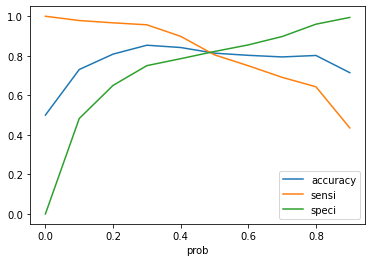

In [ ]:
#lets plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

* From the curve above, 0.55 seems to be the optimal point. We will choose this value as our cutoff probability

In [ ]:
#apply cutoff probability
y_train_pred_final['final_predicted'] = y_train_pred_final.Fraud_Prob.map( lambda x: 1 if x > 0.55 else 0)
y_train_pred_final.head()

Fraud  Fraud_Prob  predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  \
0      0    0.091809          0    1    0    0    0    0    0    0    0    0   
1      0    0.706218          1    1    1    1    1    1    1    1    1    0   
2      0    0.409133          0    1    1    1    1    1    0    0    0    0   
3      0    0.737664          1    1    1    1    1    1    1    1    1    0   
4      0    0.472161          0    1    1    1    1    1    0    0    0    0   

   0.9  final_predicted  
0    0                0  
1    0                1  
2    0                0  
3    0                1  
4    0                0

In [ ]:
#lets predict on train dataset with optimal cutoff probability
y_train_pred = Lr.predict_proba(X_train_df)[:,1]
y_train_pred_final = pd.DataFrame({'Fraud':y_train_smote, 'Fraud_Prob':y_train_pred})
y_train_pred_final['Fraud_Prob'] = y_train_pred
y_train_pred_final['predicted'] = y_train_pred_final.Fraud_Prob.map(lambda x: 1 if x > 0.55 else 0)
y_train_pred_final.head()

Fraud  Fraud_Prob  predicted
0      0    0.091809          0
1      0    0.706218          1
2      0    0.409133          0
3      0    0.737664          1
4      0    0.472161          0

In [ ]:
#lets find out all scores of train dataset
#print all scores
confusion = metrics.confusion_matrix(y_train_pred_final.Fraud, y_train_pred_final.predicted)
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
print("Roc_auc_score :",(metrics.roc_auc_score(y_train_pred_final.Fraud, y_train_pred_final.predicted)))
print('precision score:',(metrics.precision_score(y_train_pred_final.Fraud, y_train_pred_final.predicted)))
print('Sensitivity/Recall :',(TP / float(TP+FN)))
print('Specificity:',(TN / float(TN+FP)))
print('False Positive Rate:',(FP/ float(TN+FP)))
print('Positive predictive value:',(TP / float(TP+FP)))
print('Negative Predictive value:',(TN / float(TN+ FN)))

Roc_auc_score : 0.8079627263764487
precision score: 0.8289301006137572
Sensitivity/Recall : 0.776090644438394
Specificity: 0.8398348083145034
False Positive Rate: 0.16016519168549662
Positive predictive value: 0.8289301006137572
Negative Predictive value: 0.7895082641434036


In [ ]:
#lets predict on test datset with optimal cutoff obtained earlier
y_test_pred = Lr.predict_proba(X_test_df)[:,1]
y_test_pred_final = pd.DataFrame({'Fraud':test_label, 'Fraud_Prob':y_test_pred})
y_test_pred_final['Fraud_Prob'] = y_test_pred
y_test_pred_final['predicted'] = y_test_pred_final.Fraud_Prob.map(lambda x: 1 if x > 0.55 else 0)
y_test_pred_final.head()

Fraud  Fraud_Prob  predicted
0      0    0.004779          0
1      0    0.022786          0
2      0    0.019654          0
3      0    0.086840          0
4      0    0.012132          0

In [ ]:
#lets find out all scores of test dataset
#print all scores
confusion = metrics.confusion_matrix(y_test_pred_final.Fraud, y_test_pred_final.predicted)
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
print("Roc_auc_score :",metrics.roc_auc_score(y_test_pred_final.Fraud, y_test_pred_final.predicted))
print('precision score :',(metrics.precision_score(y_test_pred_final.Fraud, y_test_pred_final.predicted)))
print('Sensitivity/Recall :',(TP / float(TP+FN)))
print('Specificity:',(TN / float(TN+FP)))
print('False Positive Rate:',(FP/ float(TN+FP)))
print('Positive predictive value:',(TP / float(TP+FP)))
print('Negative Predictive value:',(TN / float(TN+ FN)))

Roc_auc_score : 0.7976371680552151
precision score : 0.017686897346421857
Sensitivity/Recall : 0.7585081585081586
Specificity: 0.8367661776022718
False Positive Rate: 0.1632338223977282
Positive predictive value: 0.017686897346421857
Negative Predictive value: 0.9988829706941539


#### As you can see above stats with logistics regression on Test Dataset is:

1) Sensitivity/Recall : 0.7585081585081586

2) Specificity: 0.8367661776022718
#### Stats On Train dataset was:

1) Sensitivity/Recall : 0.776090644438394

2) Specificity: 0.8398348083145034


## Decision Tree Model

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
y_train.shape

(1296675,)

In [ ]:
%%time

#creating a decision tree with the default parameters (except class_weight and max_depth)

#keeping the depth as a small number so as to control overfitting

dt_def = DecisionTreeClassifier(class_weight = "balanced", max_depth = 10) #use of balanced in class weight:  it basically means replicating the smaller classes until we have as many samples as in the larger one, but in an implicit way
dt_def.fit(X_train_df, y_train_smote)

CPU times: total: 29.4 s
Wall time: 30.8 s


DecisionTreeClassifier(class_weight='balanced', max_depth=10)

In [ ]:
#making predictions using the train data
y_train_pred_dt = dt_def.predict(X_train_df)

#making predictions using the test data
y_pred_dt = dt_def.predict(X_test_df)

In [ ]:
from sklearn.metrics import accuracy_score

#calculating some metrics

print("Train Accuracy :", accuracy_score(y_train_smote, y_train_pred_dt))
print("x"+ "-"*50 + "x")
print("Test Accuracy :", accuracy_score(test_label, y_pred_dt))

Train Accuracy : 0.9751444535200583
x--------------------------------------------------x
Test Accuracy : 0.9629632961982585


In [ ]:
#creating the confusion matrix for the train data

confusion_tree = confusion_matrix(y_train_smote, y_train_pred_dt)

TP = confusion_tree[1,1] # true positive 
TN = confusion_tree[0,0] # true negatives
FP = confusion_tree[0,1] # false positives
FN = confusion_tree[1,0] # false negatives

print('Acuracy:', accuracy_score(y_train_smote, y_train_pred_dt))
print('Sensitivity:', TP/float(TP+FN))
print('Specificity:', TN/float(TN+FP))
print('Precision:', TP/float(TP+FP))
print('Recall:', TP/float(TP+ FN))

Acuracy: 0.9751444535200583
Sensitivity: 0.9855069428445766
Specificity: 0.96478196419554
Precision: 0.9654970373595909
Recall: 0.9855069428445766


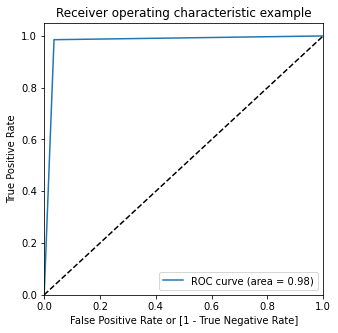

In [ ]:
#plotting roc curve for the train data
draw_roc(y_train_smote, y_train_pred_dt)

In [ ]:
#creating the confusion matrix for the test data

confusion_tree = confusion_matrix(test_label, y_pred_dt)

TP = confusion_tree[1,1] # true positive 
TN = confusion_tree[0,0] # true negatives
FP = confusion_tree[0,1] # false positives
FN = confusion_tree[1,0] # false negatives

print('Acuracy:', accuracy_score(test_label, y_pred_dt))
print('Sensitivity:', TP/float(TP+FN))
print('Specificity:', TN/float(TN+FP))
print('Precision:', TP/float(TP+FP))
print('Recall:', TP/float(TP+ FN))

Acuracy: 0.9629632961982585
Sensitivity: 0.9529137529137529
Specificity: 0.9630022363767085
Precision: 0.09074361820199778
Recall: 0.9529137529137529


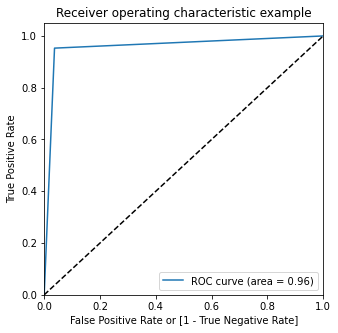

In [ ]:
#plotting roc curve for the test data
draw_roc(test_label, y_pred_dt)

## Random forest Modeling

In [ ]:
# Importing random forest classifier
from sklearn.ensemble import RandomForestClassifier

#Creating a random forest with default parameters
rfc = RandomForestClassifier(n_estimators=50)


In [ ]:
%%time

rfc.fit(X_train_df, y_train_smote)

# rfc.fit(X_train, y_train)

CPU times: total: 7min 55s
Wall time: 7min 59s


RandomForestClassifier(n_estimators=50)

In [ ]:
#making predictions using the train data
y_train_pred_rf = rfc.predict(X_train_df)

# Making predictions
y_pred_rf = rfc.predict(X_test_df)

In [ ]:
# Importing classification report and confusion matrix
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

In [ ]:
#creating the confusion matrix for the test data

confusion_tree = confusion_matrix(y_train_smote, y_train_pred_rf)

TP = confusion_tree[1,1] # true positive 
TN = confusion_tree[0,0] # true negatives
FP = confusion_tree[0,1] # false positives
FN = confusion_tree[1,0] # false negatives

print('Acuracy:', accuracy_score(y_train_smote, y_train_pred_rf))
print('Sensitivity:', TP/float(TP+FN))
print('Specificity:', TN/float(TN+FP))
print('Precision:', TP/float(TP+FP))
print('Recall:', TP/float(TP+ FN))

Acuracy: 0.9999631545592549
Sensitivity: 0.9999627667125102
Specificity: 0.9999635424059995
Precision: 0.9999635423777196
Recall: 0.9999627667125102


In [ ]:
# Checking the report of our default model
print(classification_report(y_train_smote, y_train_pred_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1289169
           1       1.00      1.00      1.00   1289169

    accuracy                           1.00   2578338
   macro avg       1.00      1.00      1.00   2578338
weighted avg       1.00      1.00      1.00   2578338



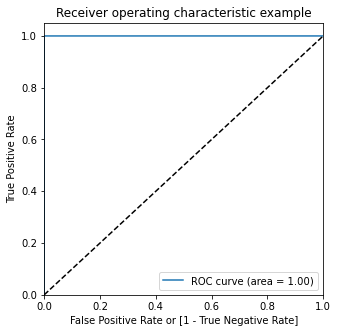

In [ ]:
#plotting an roc curve using the train data
draw_roc(y_train_smote, y_train_pred_rf)

In [ ]:
#creating the confusion matrix for the test data

confusion_tree = confusion_matrix(test_label, y_pred_dt)

TP = confusion_tree[1,1] # true positive 
TN = confusion_tree[0,0] # true negatives
FP = confusion_tree[0,1] # false positives
FN = confusion_tree[1,0] # false negatives

print('Acuracy:', accuracy_score(test_label, y_pred_dt))
print('Sensitivity:', TP/float(TP+FN))
print('Specificity:', TN/float(TN+FP))
print('Precision:', TP/float(TP+FP))
print('Recall:', TP/float(TP+ FN))

Acuracy: 0.9629632961982585
Sensitivity: 0.9529137529137529
Specificity: 0.9630022363767085
Precision: 0.09074361820199778
Recall: 0.9529137529137529


In [ ]:
# Checking the report of our default model
print(classification_report(test_label, y_pred_rf))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00    553574
           1       0.29      0.86      0.44      2145

    accuracy                           0.99    555719
   macro avg       0.65      0.92      0.72    555719
weighted avg       1.00      0.99      0.99    555719



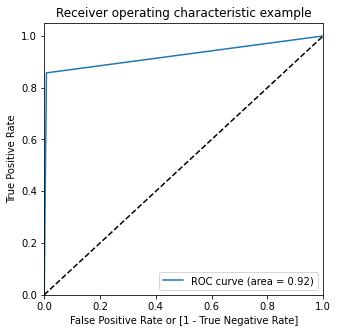

In [ ]:
#plotting an roc curve using the train data
draw_roc(test_label, y_pred_rf)

### Performing hyperparameter tuning

In [ ]:
# GridSearchCV to find optimal min_samples_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# Creating a parameter grid to the best paramteres

param_grid = {
    'max_depth': [10],
    'min_samples_leaf': [5],
    'n_estimators': [150]
}

# Creating an rf model
rf = RandomForestClassifier()

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, 
                           param_grid = param_grid,
                           scoring= 'roc_auc', #Strategy to evaluate the performance of the cross-validated model on the test set
                           cv = 3,
                           n_jobs = -1,
                           verbose = 1)



In [ ]:
%%time

# Fitting the grid search to the data
grid_search.fit(X_train_df, y_train_smote)
# grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 1 candidates, totalling 3 fits
CPU times: total: 13min 57s
Wall time: 28min 21s


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [10], 'min_samples_leaf': [5],
                         'n_estimators': [150]},
             scoring='roc_auc', verbose=1)

In [ ]:
# printing the optimal accuracy score and hyperparameters
print('Optimal score:', grid_search.best_score_, '\nOptimal hyperparameters: ', grid_search.best_params_)

Optimal score: 0.9948097628724709 
Optimal hyperparameters:  {'max_depth': 10, 'min_samples_leaf': 5, 'n_estimators': 150}


In [ ]:
# modelling random forest with the optimum hyperparameters
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(bootstrap = True,
                             max_depth = grid_search.best_params_["max_depth"],
                             min_samples_leaf = grid_search.best_params_["min_samples_leaf"], 
                             n_estimators = grid_search.best_params_["n_estimators"])

In [ ]:
%%time

#fitting the data
rfc.fit(X_train_df, y_train_smote)


CPU times: total: 13min 56s
Wall time: 14min 6s


RandomForestClassifier(max_depth=10, min_samples_leaf=5, n_estimators=150)

In [ ]:

#making predictions using the train data
y_train_pred_rf = rfc.predict(X_train_df)

#making predictions using the test data
y_pred_rf = rfc.predict(X_test_df)

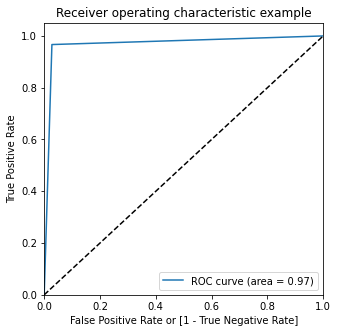

In [ ]:
#plotting an roc curve using the train data
draw_roc(y_train_smote, y_train_pred_rf)

In [ ]:
# lets predict on train dataset

print ("Accuracy :",metrics.roc_auc_score(y_train_smote, y_train_pred_rf))
print ("Recall/Sensitivity :",metrics.recall_score(y_train_smote, y_train_pred_rf))
print ("AUC Score (Train):",metrics.roc_auc_score(y_train_smote, y_train_pred_rf))

Accuracy : 0.9695520913084319
Recall/Sensitivity : 0.9667413659496932
AUC Score (Train): 0.9695520913084319


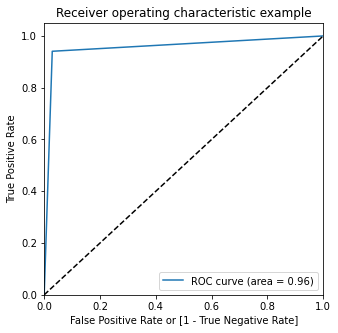

In [ ]:
#plotting an roc curve using the train data
draw_roc(test_label, y_pred_rf)

In [ ]:
# lets predict on test dataset

print(metrics.confusion_matrix(test_label, y_pred_rf), "\n") #printing the confusion matrix
print("Accuracy: ", metrics.accuracy_score(test_label, y_pred_rf))
print("Precision: ", metrics.precision_score(test_label, y_pred_rf))
print("Sensitivity/recall: ", metrics.recall_score(test_label, y_pred_rf))
print("roc_auc_score: ", metrics.roc_auc_score(test_label, y_pred_rf))

[[537589  15985]
 [   127   2018]] 

Accuracy:  0.9710069297612642
Precision:  0.11209242903960451
Sensitivity/recall:  0.9407925407925408
roc_auc_score:  0.9559582729469682


Train and test Recall score of Random forest:

Train: Sensitivity/Recall:0.97

Test: Sensitivity/Recall:0.94



# XGBoost

In [ ]:
!pip install XGBoost

In [ ]:
from xgboost import XGBClassifier

In [ ]:
%%time

xgb_smote = XGBClassifier()
xgb_smote.fit(X_train_df, y_train_smote)

CPU times: total: 16min 28s
Wall time: 4min 19s


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [ ]:
#making predictions using the train data
y_train_pred_xgb = xgb_smote.predict(X_train_df)

#making predictions using the test data
y_pred_xgb = xgb_smote.predict(X_test_df)

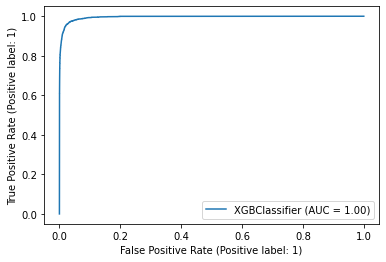

In [ ]:
#plotting an roc curve using the train data
# draw_roc(y_train_smote, y_train_pred_xgb)

metrics.plot_roc_curve(xgb_smote, X_test_df, test_label)

In [ ]:
# lets predict on train dataset

print ("Accuracy :",metrics.roc_auc_score(y_train_smote, y_train_pred_xgb))
print ("Recall/Sensitivity :",metrics.recall_score(y_train_smote, y_train_pred_xgb))
print ("AUC Score (Train):",metrics.roc_auc_score(y_train_smote, y_train_pred_xgb))

Accuracy : 0.9956146168578364
Recall/Sensitivity : 0.9969810009393648
AUC Score (Train): 0.9956146168578364


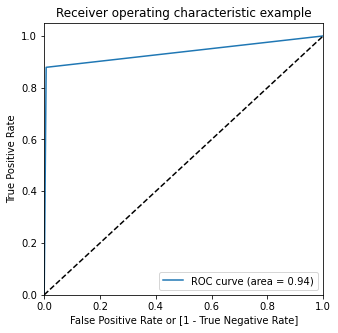

In [ ]:
#plotting an roc curve using the train data
draw_roc(test_label, y_pred_xgb)

In [ ]:
# lets predict on test dataset

print(metrics.confusion_matrix(test_label, y_pred_xgb), "\n") #printing the confusion matrix
print("Accuracy: ", metrics.accuracy_score(test_label, y_pred_xgb))
print("Precision: ", metrics.precision_score(test_label, y_pred_xgb))
print("Sensitivity/recall: ", metrics.recall_score(test_label, y_pred_xgb))
print("roc_auc_score: ", metrics.roc_auc_score(test_label, y_pred_xgb))

[[549702   3872]
 [   260   1885]] 

Accuracy:  0.992564587498358
Precision:  0.3274274795900643
Sensitivity/recall:  0.8787878787878788
roc_auc_score:  0.935896665316761


In [ ]:
# Creating a dataframe to compare the actual v/s predicted values of y:

y_pred_final_dt_ = pd.Series(y_pred_xgb)
df_pred = pd.concat([X_test_df, test_label, y_pred_final_dt_], axis = 1)
df_pred.rename(columns = {0:'y_pred'}, inplace = True)
df_pred.head()

Age  amt_boxcox  category_food_dining  category_gas_transport  \
0  0.469136    0.043457                   0.0                     0.0   
1  0.197531    0.201162                   0.0                     0.0   
2  0.432099    0.228135                   0.0                     0.0   
3  0.222222    0.260646                   0.0                     0.0   
4  0.617284    0.049075                   0.0                     0.0   

   category_grocery_net  category_grocery_pos  category_health_fitness  \
0                   0.0                   0.0                      0.0   
1                   0.0                   0.0                      0.0   
2                   0.0                   0.0                      1.0   
3                   0.0                   0.0                      0.0   
4                   0.0                   0.0                      0.0   

   category_home  category_kids_pets  category_misc_net  category_misc_pos  \
0            0.0                 0.0                0.0                0.0   
1            0.0                 0.0                0.0                0.0   
2            0.0                 0.0                0.0                0.0   
3            0.0                 0.0                0.0                1.0   
4            0.0                 0.0                0.0                0.0   

   category_personal_care  category_shopping_net  category_shopping_pos  \
0                     1.0                    0.0                    0.0   
1                     1.0                    0.0                    0.0   
2                     0.0                    0.0                    0.0   
3                     0.0                    0.0                    0.0   
4                     0.0                    0.0                    0.0   

   category_travel  session_Early Morning  session_Morning  session_Noon  \
0              0.0                    0.0              1.0           0.0   
1              0.0                    0.0              1.0           0.0   
2              0.0                    0.0              1.0           0.0   
3              0.0                    0.0              1.0           0.0   
4              1.0                    0.0              1.0           0.0   

   session_Evening  session_Night  is_fraud  y_pred  
0              0.0            0.0         0       0  
1              0.0            0.0         0       0  
2              0.0            0.0         0       0  
3              0.0            0.0         0       0  
4              0.0            0.0         0       0

In [ ]:
# Extracting only the fraudulent transactions from this test dataset:

fraud_df = df_pred[df_pred.is_fraud==1]
fraud_df.head()

Age  amt_boxcox  category_food_dining  category_gas_transport  \
1685  0.444444    0.186411                   0.0                     0.0   
1767  0.580247    0.522811                   0.0                     0.0   
1781  0.580247    0.496363                   0.0                     0.0   
1784  0.148148    0.561020                   0.0                     0.0   
1857  0.444444    0.531769                   0.0                     0.0   

      category_grocery_net  category_grocery_pos  category_health_fitness  \
1685                   0.0                   0.0                      1.0   
1767                   0.0                   0.0                      0.0   
1781                   0.0                   0.0                      0.0   
1784                   0.0                   0.0                      0.0   
1857                   0.0                   0.0                      0.0   

      category_home  category_kids_pets  category_misc_net  category_misc_pos  \
1685            0.0                 0.0                0.0                0.0   
1767            0.0                 0.0                1.0                0.0   
1781            0.0                 0.0                0.0                0.0   
1784            0.0                 0.0                0.0                0.0   
1857            0.0                 0.0                0.0                0.0   

      category_personal_care  category_shopping_net  category_shopping_pos  \
1685                     0.0                    0.0                    0.0   
1767                     0.0                    0.0                    0.0   
1781                     0.0                    0.0                    0.0   
1784                     0.0                    1.0                    0.0   
1857                     0.0                    0.0                    1.0   

      category_travel  session_Early Morning  session_Morning  session_Noon  \
1685              0.0                    0.0              0.0           0.0   
1767              0.0                    0.0              0.0           0.0   
1781              0.0                    0.0              0.0           0.0   
1784              0.0                    0.0              0.0           0.0   
1857              0.0                    0.0              0.0           0.0   

      session_Evening  session_Night  is_fraud  y_pred  
1685              0.0            1.0         1       0  
1767              0.0            1.0         1       1  
1781              0.0            1.0         1       1  
1784              0.0            1.0         1       1  
1857              0.0            1.0         1       1

> # `Cost Benefit Analysis`
- The Cost Benefit Analysis is to be done on the original data
- Merging the train and test data to make an original dataframe

In [ ]:
# Let us merge the dataset to form the original

fraud = pd.concat([df_train_copy, df_test_copy], axis=0)
fraud.head()

Unnamed: 0 trans_date_trans_time            cc_num  \
0           0   2019-01-01 00:00:18  2703186189652095   
1           1   2019-01-01 00:00:44      630423337322   
2           2   2019-01-01 00:00:51    38859492057661   
3           3   2019-01-01 00:01:16  3534093764340240   
4           4   2019-01-01 00:03:06   375534208663984   

                             merchant       category     amt      first  \
0          fraud_Rippin, Kub and Mann       misc_net    4.97   Jennifer   
1     fraud_Heller, Gutmann and Zieme    grocery_pos  107.23  Stephanie   
2                fraud_Lind-Buckridge  entertainment  220.11     Edward   
3  fraud_Kutch, Hermiston and Farrell  gas_transport   45.00     Jeremy   
4                 fraud_Keeling-Crist       misc_pos   41.96      Tyler   

      last gender                        street            city state    zip  \
0    Banks      F                561 Perry Cove  Moravian Falls    NC  28654   
1     Gill      F  43039 Riley Greens Suite 393          Orient    WA  99160   
2  Sanchez      M      594 White Dale Suite 530      Malad City    ID  83252   
3    White      M   9443 Cynthia Court Apt. 038         Boulder    MT  59632   
4   Garcia      M              408 Bradley Rest        Doe Hill    VA  24433   

       lat      long  city_pop                                job         dob  \
0  36.0788  -81.1781      3495          Psychologist, counselling  1988-03-09   
1  48.8878 -118.2105       149  Special educational needs teacher  1978-06-21   
2  42.1808 -112.2620      4154        Nature conservation officer  1962-01-19   
3  46.2306 -112.1138      1939                    Patent attorney  1967-01-12   
4  38.4207  -79.4629        99     Dance movement psychotherapist  1986-03-28   

                          trans_num   unix_time  merch_lat  merch_long  \
0  0b242abb623afc578575680df30655b9  1325376018  36.011293  -82.048315   
1  1f76529f8574734946361c461b024d99  1325376044  49.159047 -118.186462   
2  a1a22d70485983eac12b5b88dad1cf95  1325376051  43.150704 -112.154481   
3  6b849c168bdad6f867558c3793159a81  1325376076  47.034331 -112.561071   
4  a41d7549acf90789359a9aa5346dcb46  1325376186  38.674999  -78.632459   

   is_fraud  
0         0  
1         0  
2         0  
3         0  
4         0

In [ ]:
fraud.shape

(1852394, 23)

#### Let us take a look at what we need to do in order to perform the cost-benefit analysis step by step:
- ### Part I: Analyse the dataset and find the following figures:

> 1. Average number of transactions per month 
> 2. Average number of fraudulent transactions per month
> 3. Average amount per fraudulent transaction 

In [ ]:
# Since the given (original) dataset is from Jan 1 2019 to Dec 31 2020, the data is of 24 months
# Total transactions can be found by checking the shape of the original dataframe
# Avg transactions per month would be to divide that shape/total by 24 (months)

avg_transactions_pm = fraud.shape[0]//24

In [ ]:
print("1. Average number of transactions per month are:", avg_transactions_pm)

1. Average number of transactions per month are: 77183


In [ ]:
# Checking only for fraudulent transactions:

fraud[fraud.is_fraud == 1]

Unnamed: 0 trans_date_trans_time            cc_num  \
2449          2449   2019-01-02 01:06:37     4613314721966   
2472          2472   2019-01-02 01:47:29   340187018810220   
2523          2523   2019-01-02 03:05:23   340187018810220   
2546          2546   2019-01-02 03:38:03     4613314721966   
2553          2553   2019-01-02 03:55:47   340187018810220   
...            ...                   ...               ...   
517197      517197   2020-12-22 22:05:48  2242176657877538   
517274      517274   2020-12-22 22:18:07  2242176657877538   
517341      517341   2020-12-22 22:31:48  2242176657877538   
517529      517529   2020-12-22 23:06:03  2242176657877538   
517571      517571   2020-12-22 23:13:39  2242176657877538   

                                   merchant       category      amt   first  \
2449                 fraud_Rutherford-Mertz    grocery_pos   281.06   Jason   
2472       fraud_Jenkins, Hauck and Friesen  gas_transport    11.52   Misty   
2523                 fraud_Goodwin-Nitzsche    grocery_pos   276.31   Misty   
2546                 fraud_Erdman-Kertzmann  gas_transport     7.03   Jason   
2553                     fraud_Koepp-Parker    grocery_pos   275.73   Misty   
...                                     ...            ...      ...     ...   
517197      fraud_Willms, Kris and Bergnaum   shopping_pos  1041.51  Travis   
517274                       fraud_Kuhn LLC   shopping_pos   868.09  Travis   
517341  fraud_Mosciski, Ziemann and Farrell   shopping_net  1039.42  Travis   
517529                   fraud_Bauch-Raynor    grocery_pos   289.27  Travis   
517571           fraud_Jaskolski-Vandervort       misc_net   766.38  Travis   

          last gender                       street           city state  \
2449    Murphy      M    542 Steve Curve Suite 011  Collettsville    NC   
2472      Hart      F    27954 Hall Mill Suite 575    San Antonio    TX   
2523      Hart      F    27954 Hall Mill Suite 575    San Antonio    TX   
2546    Murphy      M    542 Steve Curve Suite 011  Collettsville    NC   
2553      Hart      F    27954 Hall Mill Suite 575    San Antonio    TX   
...        ...    ...                          ...            ...   ...   
517197  Daniel      M  1327 Rose Causeway Apt. 610      Senatobia    MS   
517274  Daniel      M  1327 Rose Causeway Apt. 610      Senatobia    MS   
517341  Daniel      M  1327 Rose Causeway Apt. 610      Senatobia    MS   
517529  Daniel      M  1327 Rose Causeway Apt. 610      Senatobia    MS   
517571  Daniel      M  1327 Rose Causeway Apt. 610      Senatobia    MS   

          zip      lat     long  city_pop                       job  \
2449    28611  35.9946 -81.7266       885            Soil scientist   
2472    78208  29.4400 -98.4590   1595797  Horticultural consultant   
2523    78208  29.4400 -98.4590   1595797  Horticultural consultant   
2546    28611  35.9946 -81.7266       885            Soil scientist   
2553    78208  29.4400 -98.4590   1595797  Horticultural consultant   
...       ...      ...      ...       ...                       ...   
517197  38668  34.6323 -89.8855     14462    Database administrator   
517274  38668  34.6323 -89.8855     14462    Database administrator   
517341  38668  34.6323 -89.8855     14462    Database administrator   
517529  38668  34.6323 -89.8855     14462    Database administrator   
517571  38668  34.6323 -89.8855     14462    Database administrator   

               dob                         trans_num   unix_time  merch_lat  \
2449    1988-09-15  e8a81877ae9a0a7f883e15cb39dc4022  1325466397  36.430124   
2472    1960-10-28  bc7d41c41103877b03232f03f1f8d3f5  1325468849  29.819364   
2523    1960-10-28  b98f12f4168391b2203238813df5aa8c  1325473523  29.273085   
2546    1988-09-15  397894a5c4c02e3c61c784001f0f14e4  1325475483  35.909292   
2553    1960-10-28  7863235a750d73a244c07f1fb7f0185a  1325476547  29.786426   
...            ...                               ...         ...        ...   
517197 

In [ ]:
# Fraudulent transactions are 9651 (number of rows) that are spread across 24 months
# Avg fraudulent transactions per month would be to divide the shape/total fraudulent rows by 24 (months)

avg_fraudtrans_pm = fraud[fraud.is_fraud == 1].shape[0]//24

In [ ]:
print("2. Average number of fraudulent transactions per month are:", avg_fraudtrans_pm)

2. Average number of fraudulent transactions per month are: 402


In [ ]:
# Average amount of fraud is the total fraudulent amount divided by the total number of fraudulent transactions

avg_fraud_amt = fraud[fraud.is_fraud == 1].amt.sum()//fraud[fraud.is_fraud == 1].shape[0]

In [ ]:
print("3. Average amount per fraudulent transactions is:", avg_fraud_amt)

3. Average amount per fraudulent transactions is: 530.0


- ### Part II: Compare the cost incurred per month by the bank before and after the model deployment:

1. Cost incurred per month before the model was deployed = Average amount per fraudulent transaction * Average number of fraudulent transactions per month
2. Cost incurred per month after the model is built and deployed: (Use the test metric from the model evaluation part and the calculations performed in Part I to compute the values given below)
 

- Let TF be the average number of transactions per month detected as fraudulent by the model and let the cost of providing customer executive support per fraudulent transaction detected by the model = USD 1.5

- Total cost of providing customer support per month for fraudulent transactions detected by the model = 1.5 * TF.
- Let FN be the average number of transactions per month that are fraudulent but not detected by the model 

- Cost incurred due to these fraudulent transactions left undetected by the model = Average amount per fraudulent transaction * FN
- Therefore, the cost incurred per month after the model is built and deployed = 1.5 * TF + Average amount per fraudulent transaction * FN
- Final savings = Cost incurred before - Cost incurred after

In [ ]:
# Calculating the cost incurred before deploying the model based on the first point descibed above:

cost_before_model = avg_fraud_amt*avg_fraudtrans_pm
cost_before_model

213060.0

In [ ]:
# Let TF be the average number of transactions per month detected as fraudulent by the model 
# Since the test dataframe has 7 months data, dividing by 7

TF = fraud_df.y_pred.sum()//7
print("Total cost of providing customer support per month for fraudulent transactions detected by the model =", TF*1.5)

Total cost of providing customer support per month for fraudulent transactions detected by the model = 403.5


In [ ]:
TF

269

In [ ]:
# Let FN be the average number of transactions per month that are fraudulent but not detected by the model
# Since the test dataframe has 7 months data, dividing by 7

FN = fraud_df[fraud_df.y_pred==0].is_fraud.sum()//7
print("Cost incurred due to these fraudulent transactions left undetected by the model =", FN*avg_fraud_amt)

Cost incurred due to these fraudulent transactions left undetected by the model = 19610.0


In [ ]:
FN

37

In [ ]:
# Cost incurred after the model is deployed:

cost_after_model = (TF*1.5) + (FN*avg_fraud_amt)
cost_after_model

20013.5

In [ ]:
# Final savings = Cost incurred before - Cost incurred after

Final_Savings = int(cost_before_model - cost_after_model)
print("Final Savings after deploying the model are: $",Final_Savings)

Final Savings after deploying the model are: $ 193046


In [ ]:
print(dt.datetime.now())

2022-09-14 14:33:28.476699
